In [6]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn-whitegrid')

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
from keras.optimizers import gradient_descent_v2 
import math
from sklearn.metrics import mean_squared_error

In [21]:
stockList = ["INTC", "PFE", "CMCSA", "SAP", "TMUS", "TMO", "AMD", "NVS", "LIN", "MCD", "NFLX", "AZN", "ACN", "CRM", "BABA", "FMX", "CSCO", "SHEL", "BAC", "PEP", "ABBV", "KO", "TM", "COST", "MRK", "ASML", "CVX", "ADBE", "HD", "ORCL", "JNJ", "PG", "MA", "AVGO", "XOM", "JPM", "WMT", "NVO", "UNH", "TSM", "V", "LLY", "TSLA", "BRK-B", "META", "NVDA", "AMZN", "GOOGL", "MSFT", "AAPL"]

In [15]:
"""
import yfinance as yf
for i in stockList:
    yf.download(i, period="7y", interval="1d").to_csv("./data/"+i+".csv", encoding='utf-8')
    print(i+" is downloaded")
"""

[*********************100%%**********************]  1 of 1 completed
INTC is downloaded
[*********************100%%**********************]  1 of 1 completed
PFE is downloaded
[*********************100%%**********************]  1 of 1 completed
CMCSA is downloaded
[*********************100%%**********************]  1 of 1 completed
SAP is downloaded
[*********************100%%**********************]  1 of 1 completed
TMUS is downloaded
[*********************100%%**********************]  1 of 1 completed
TMO is downloaded
[*********************100%%**********************]  1 of 1 completed
AMD is downloaded
[*********************100%%**********************]  1 of 1 completed
NVS is downloaded
[*********************100%%**********************]  1 of 1 completed
LIN is downloaded
[*********************100%%**********************]  1 of 1 completed
MCD is downloaded
[*********************100%%**********************]  1 of 1 completed
NFLX is downloaded
[*********************100%%***********

In [22]:
df_ = {}
for i in stockList:
    df_[i] = pd.read_csv("Data/"+i+".csv", index_col="Date", parse_dates=["Date"])

In [23]:
def split(dataframe, border, col):
    return dataframe.loc[:border,col], dataframe.loc[border:,col]

df_new = {}
for i in stockList:
    df_new[i] = {}
    df_new[i]["Train"], df_new[i]["Test"] = split(df_[i], "2022", "Close")

/var/folders/tt/rynv9sfx6hd7zsm3w8y6qv8c0000gn/T/ipykernel_4479/1101381474.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14,4))


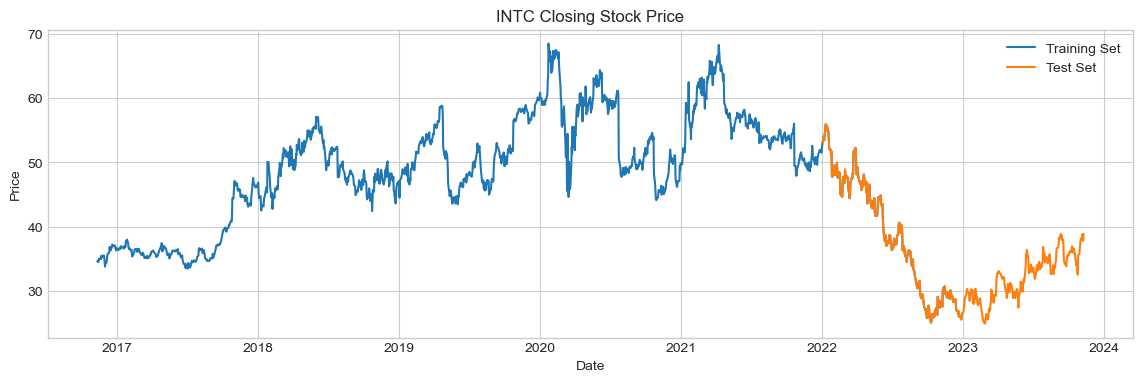

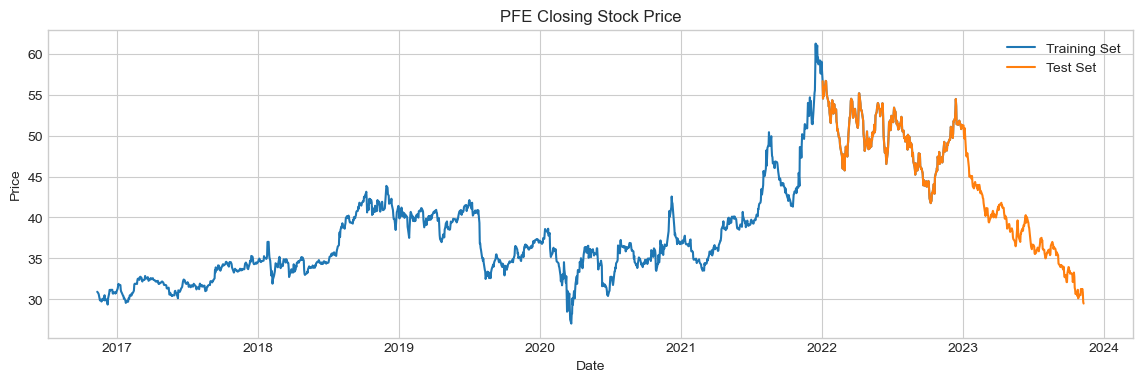

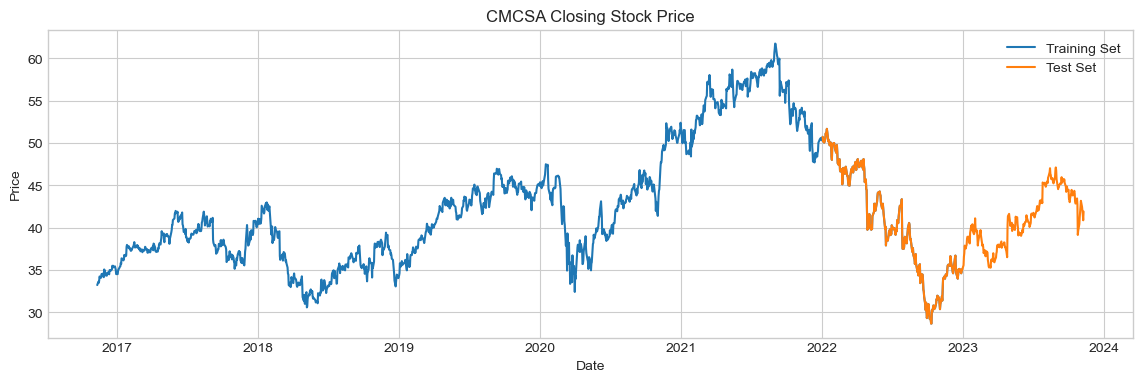

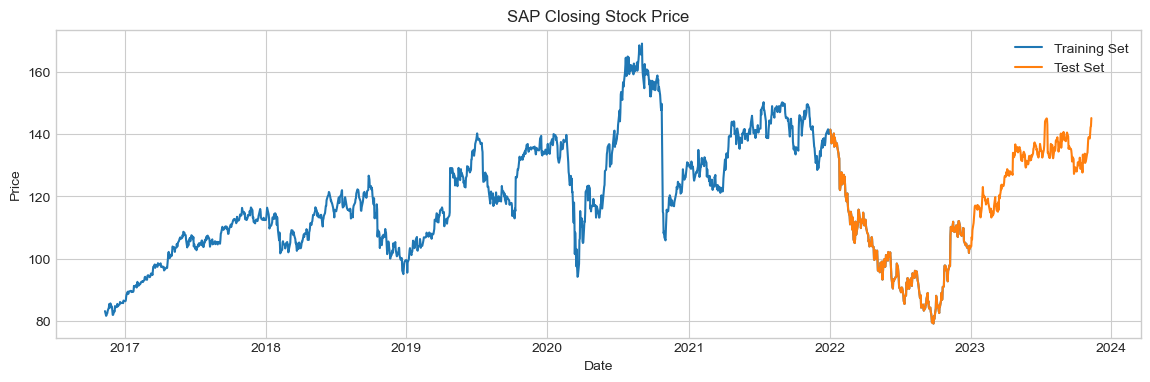

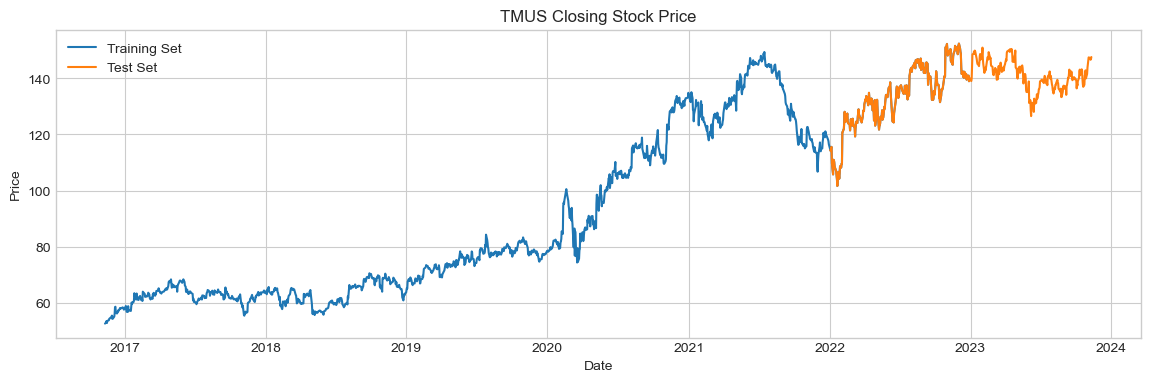

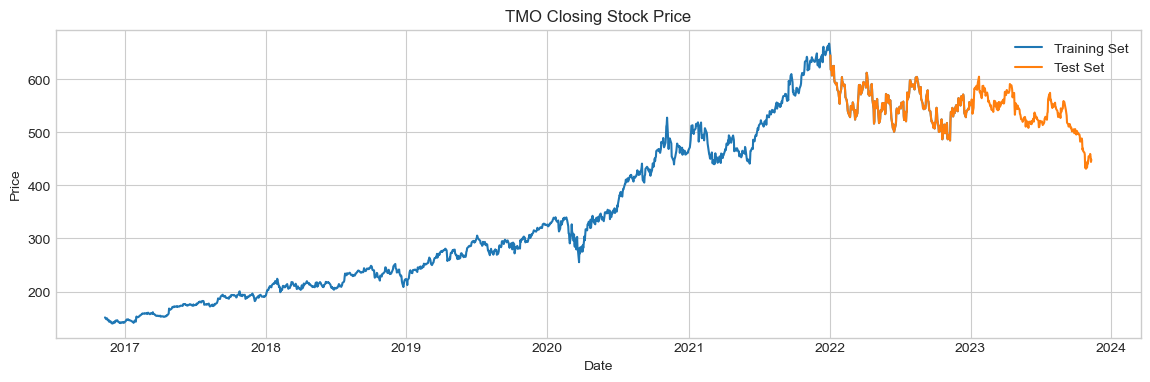

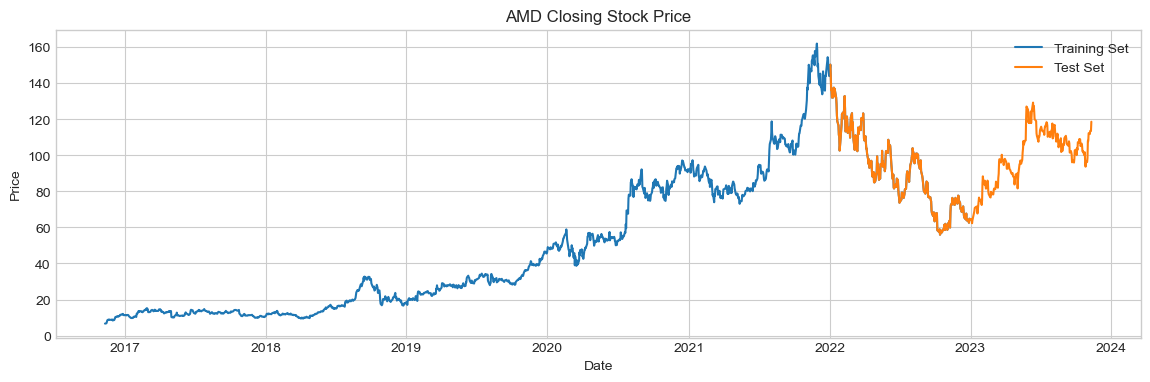

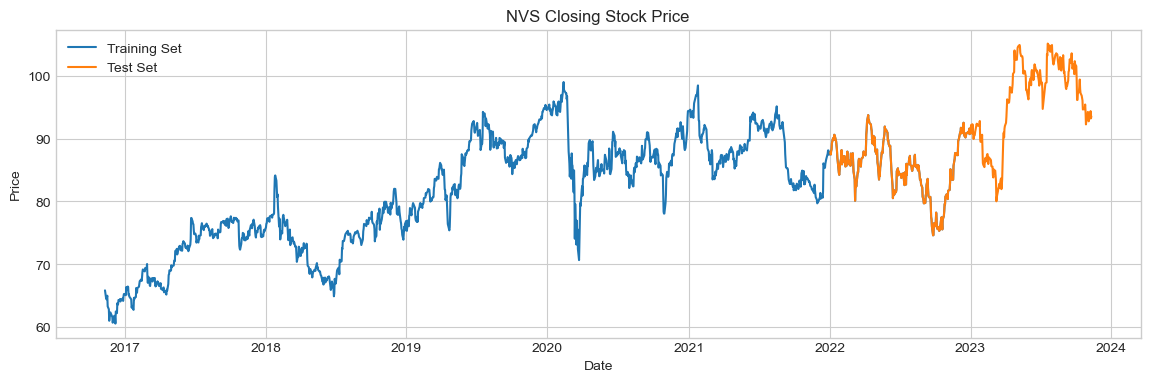

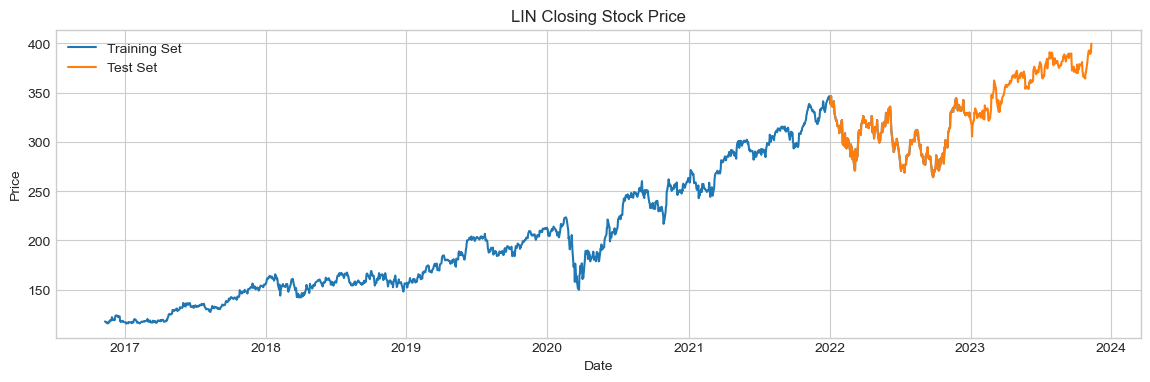

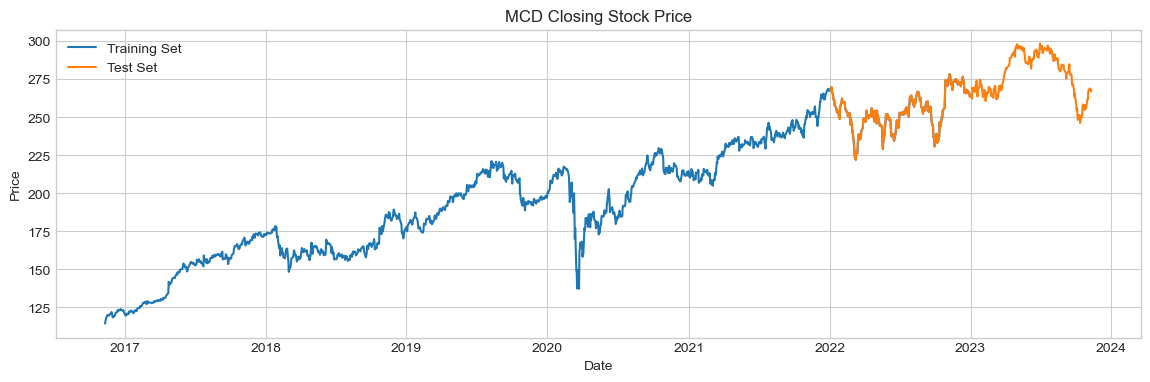

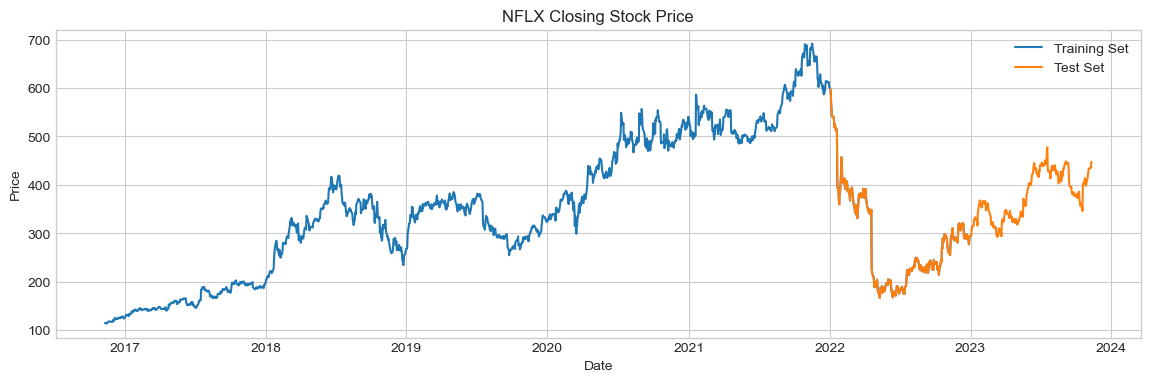

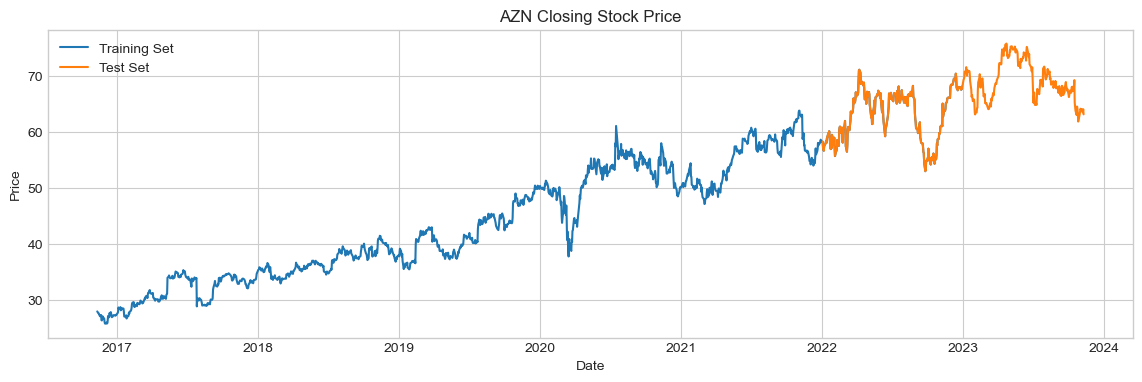

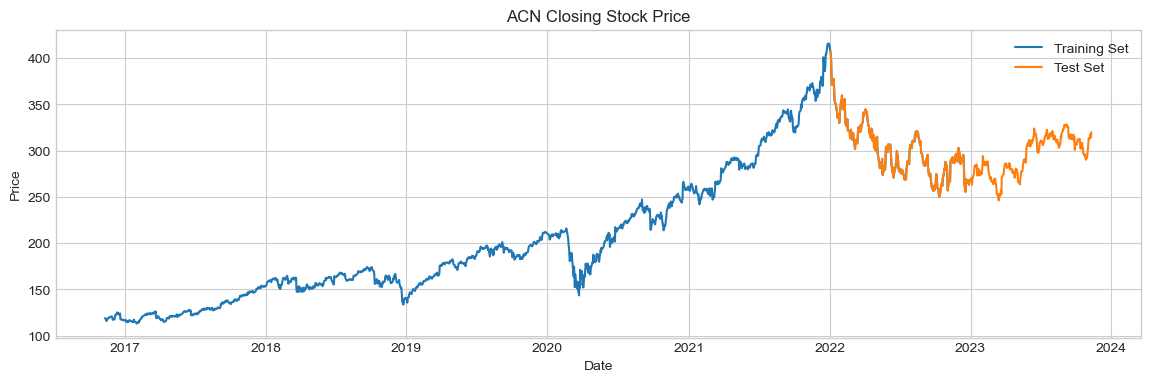

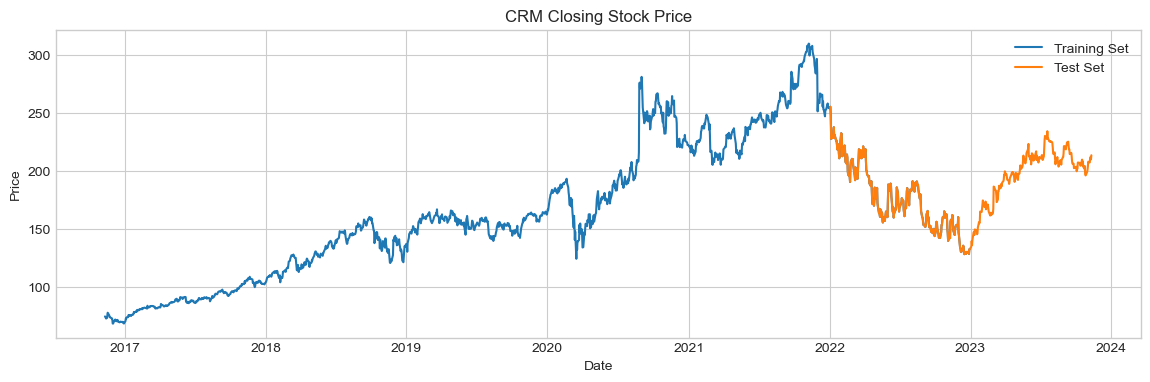

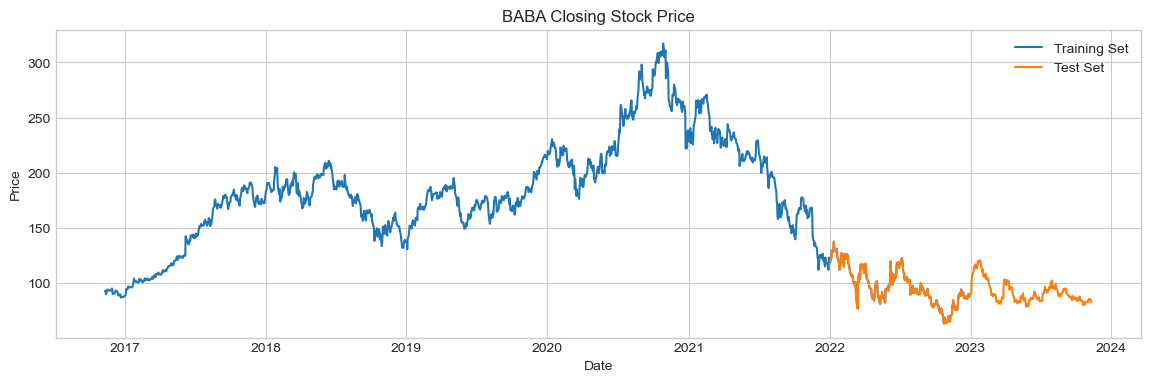

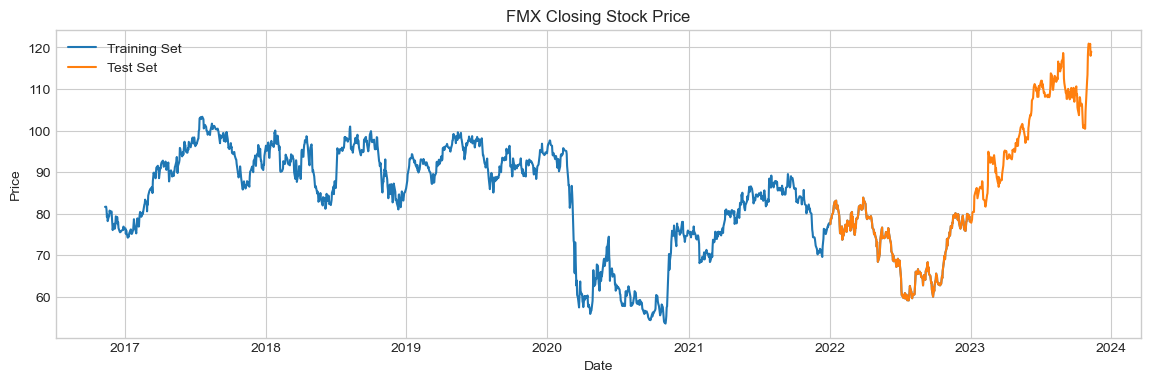

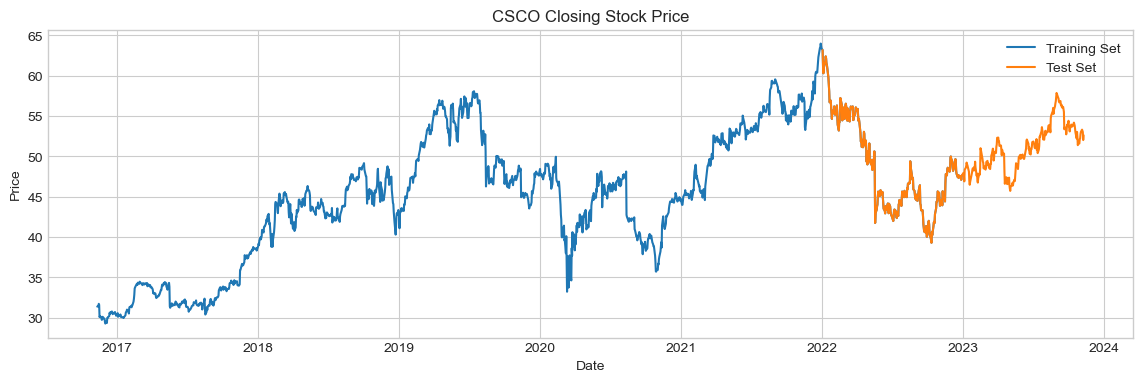

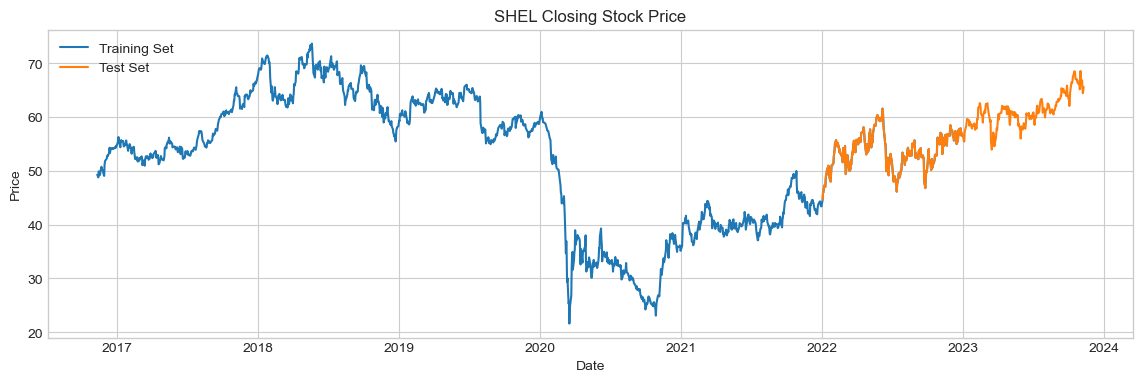

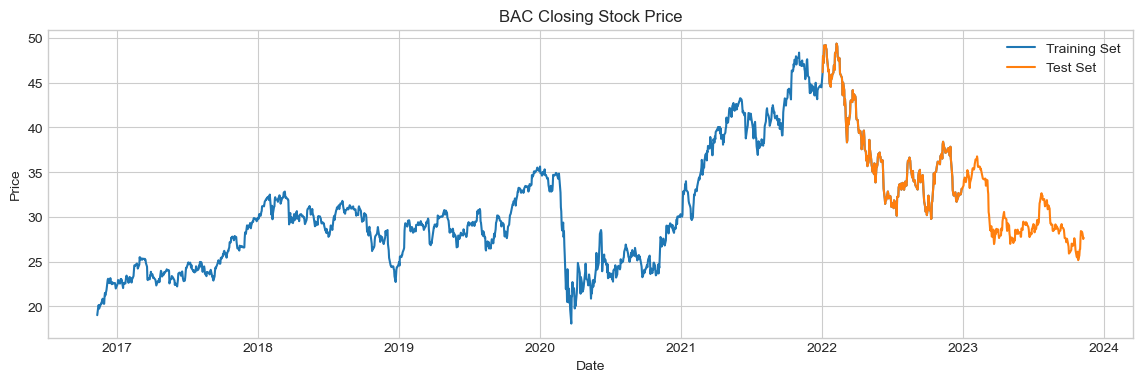

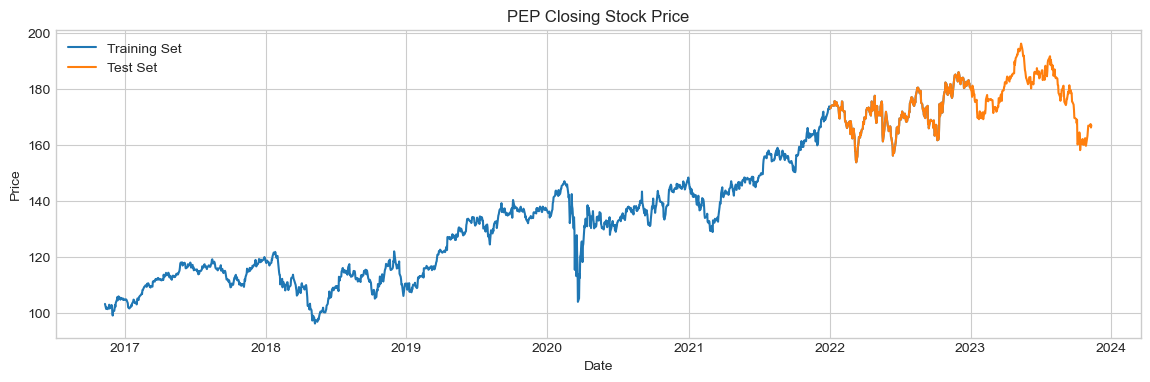

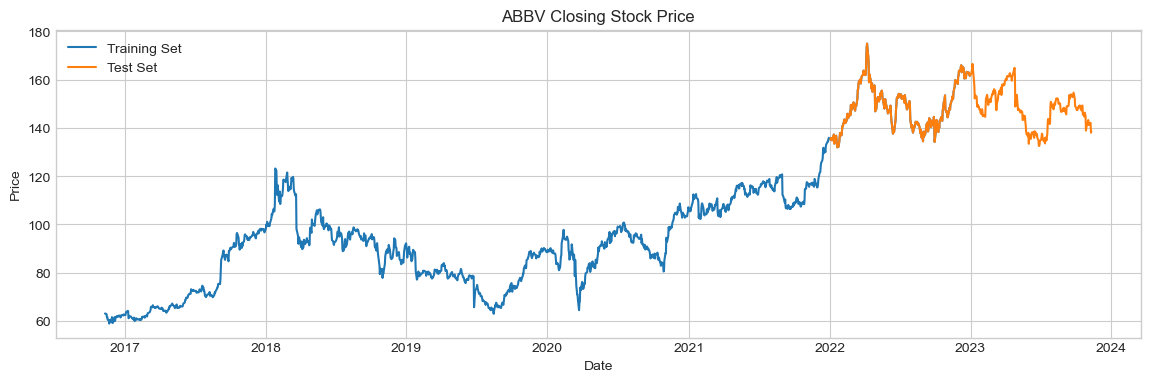

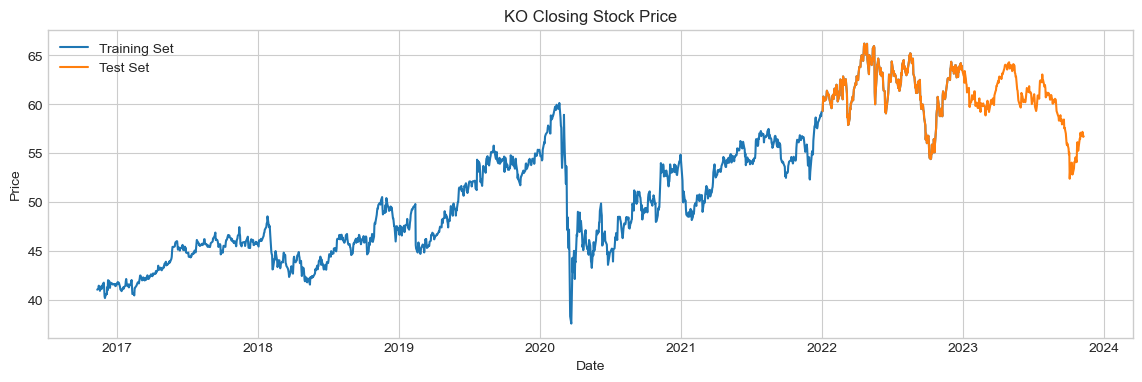

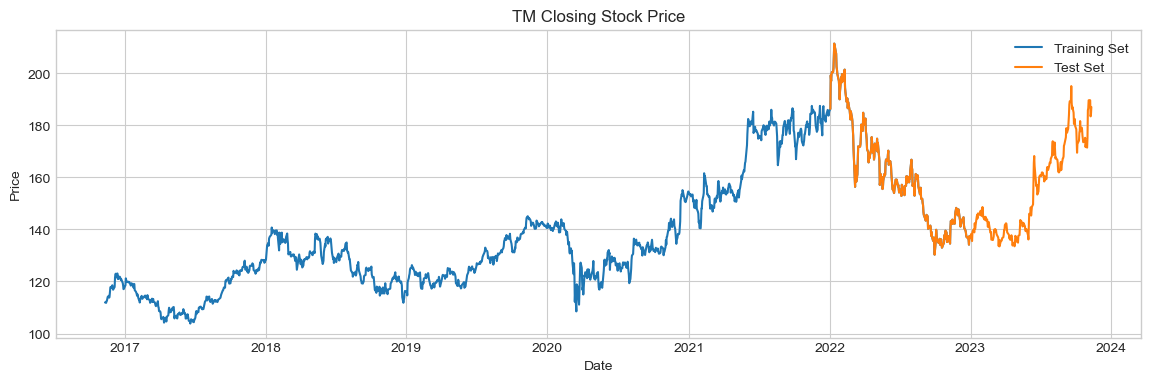

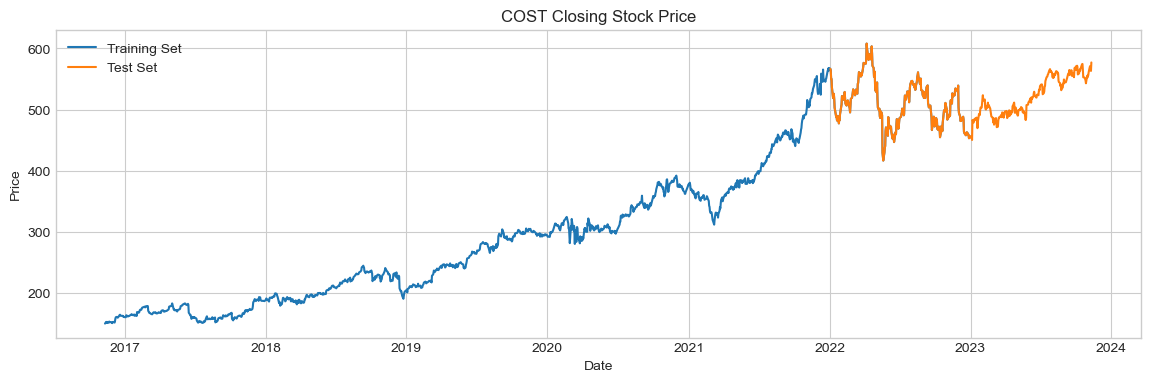

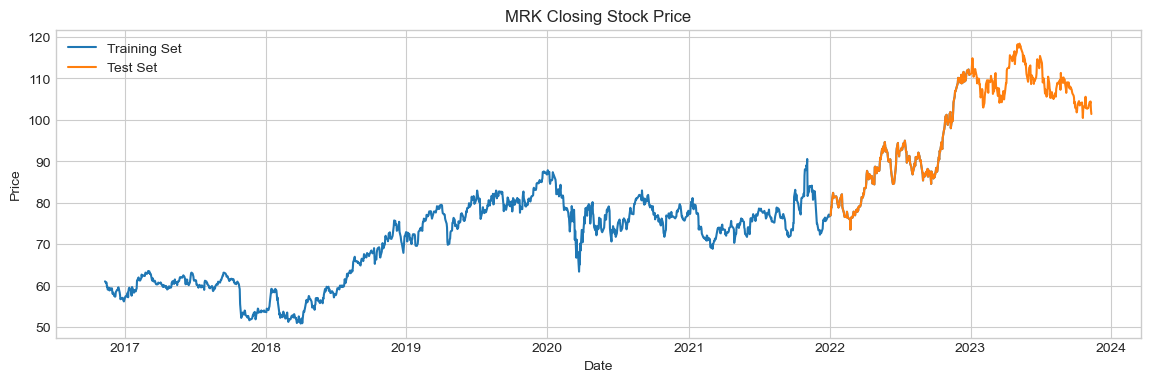

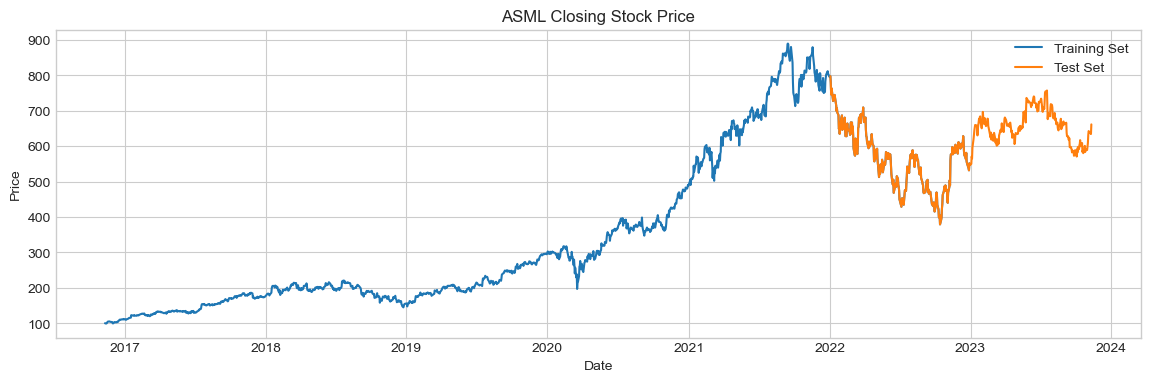

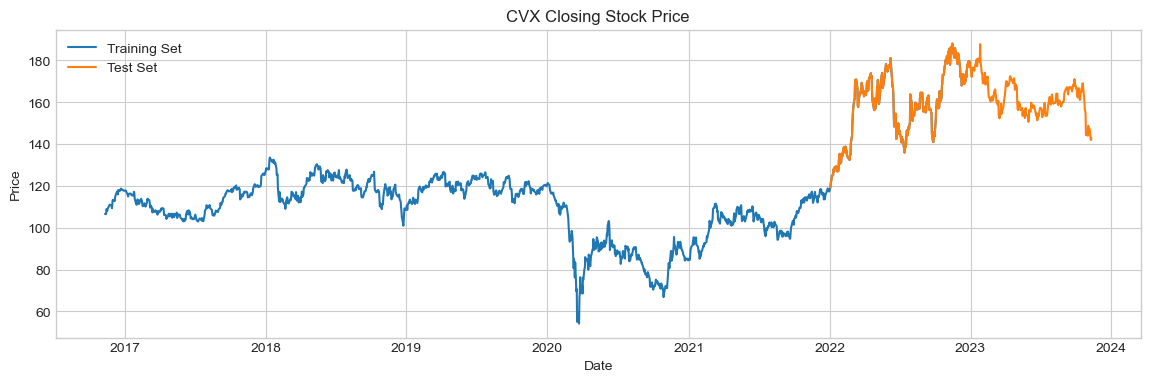

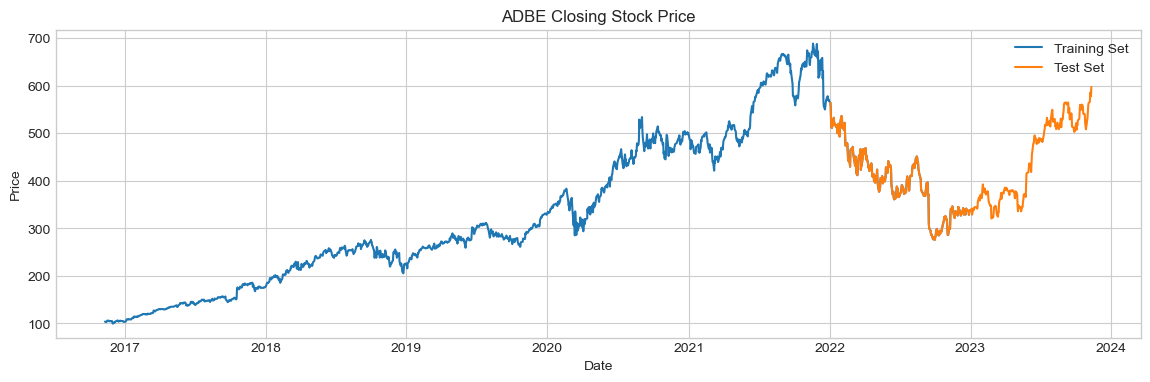

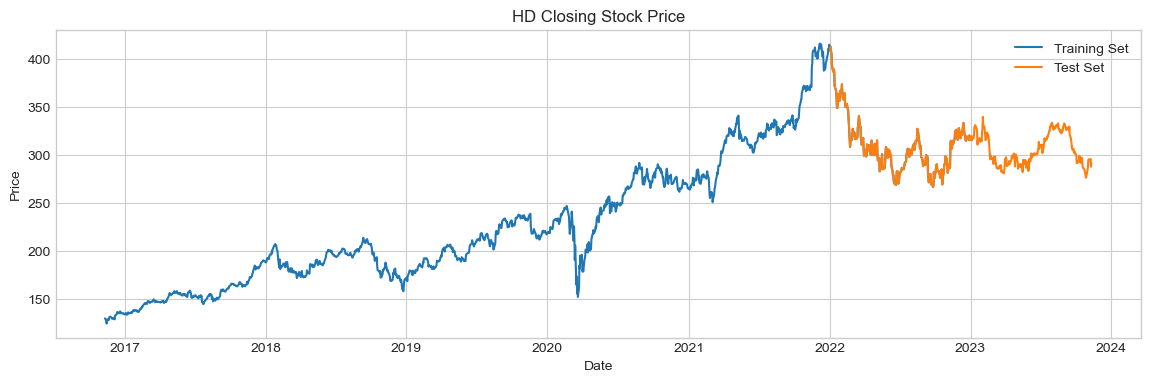

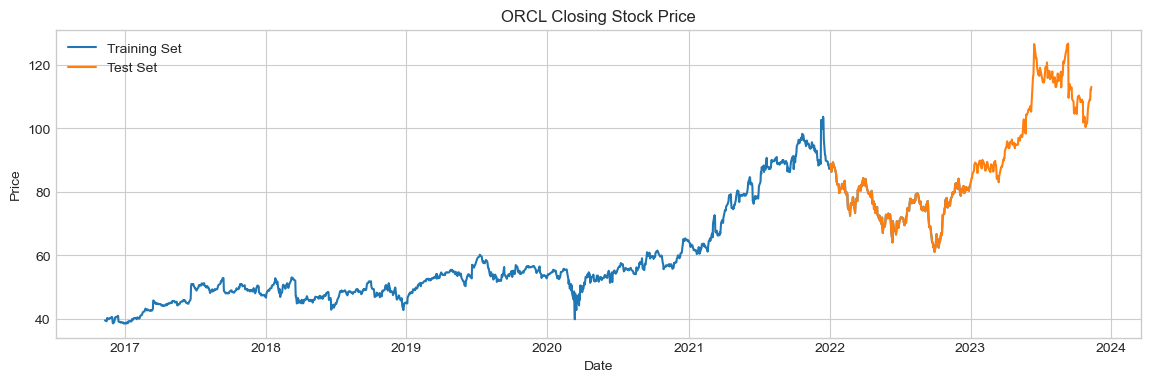

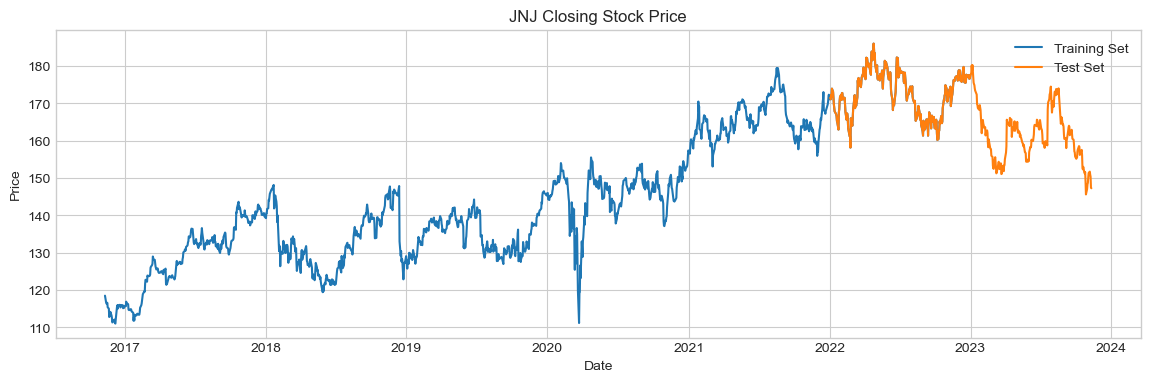

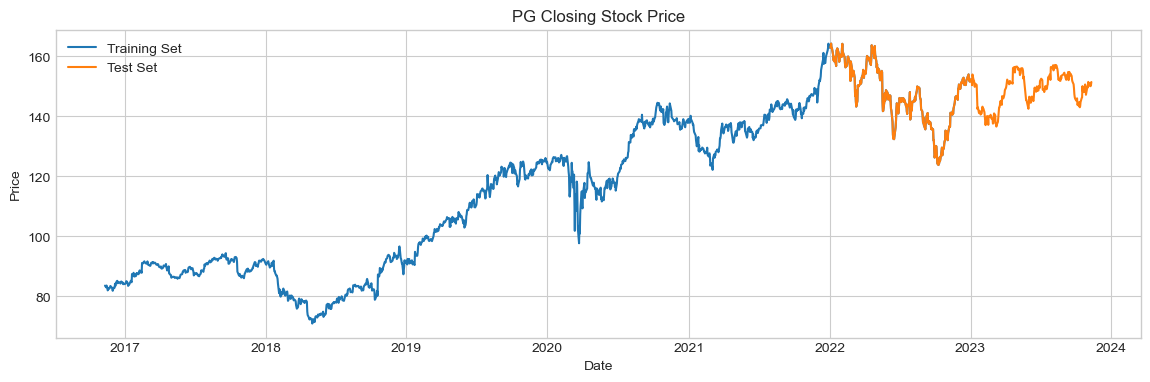

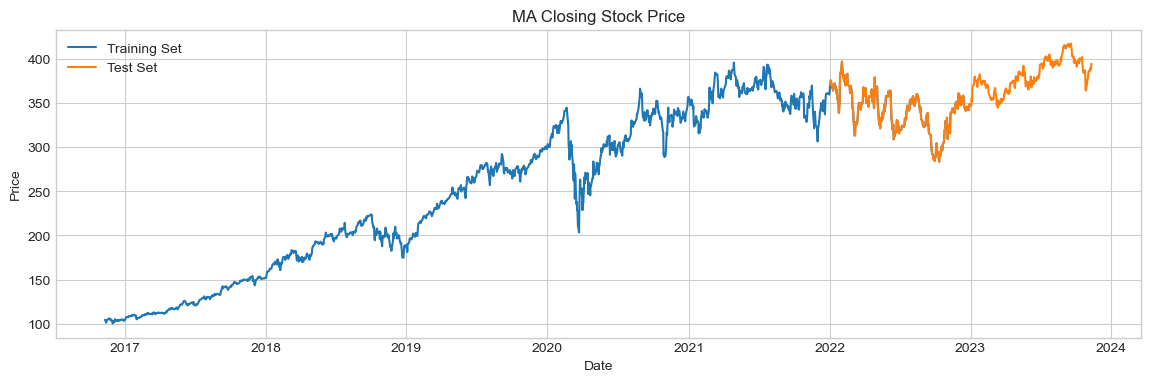

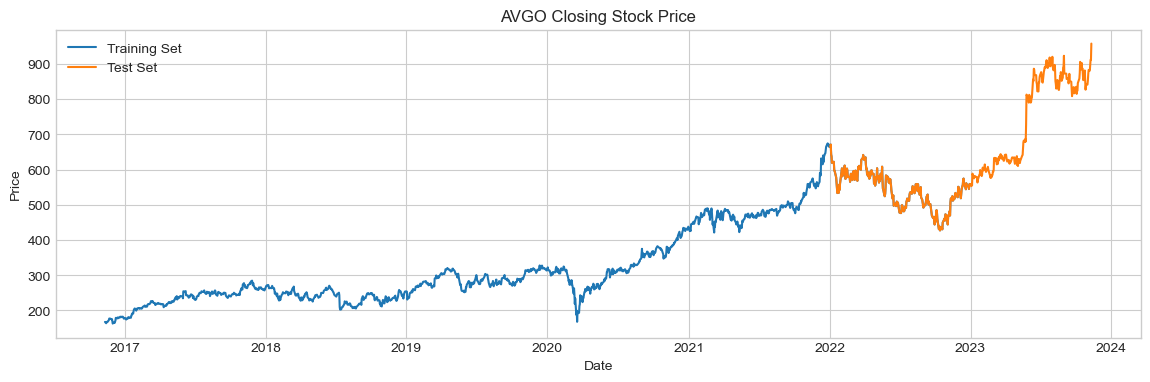

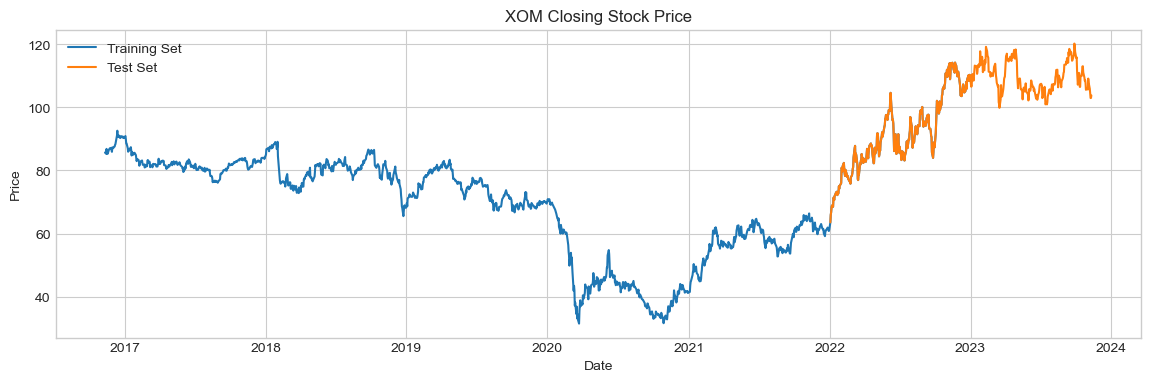

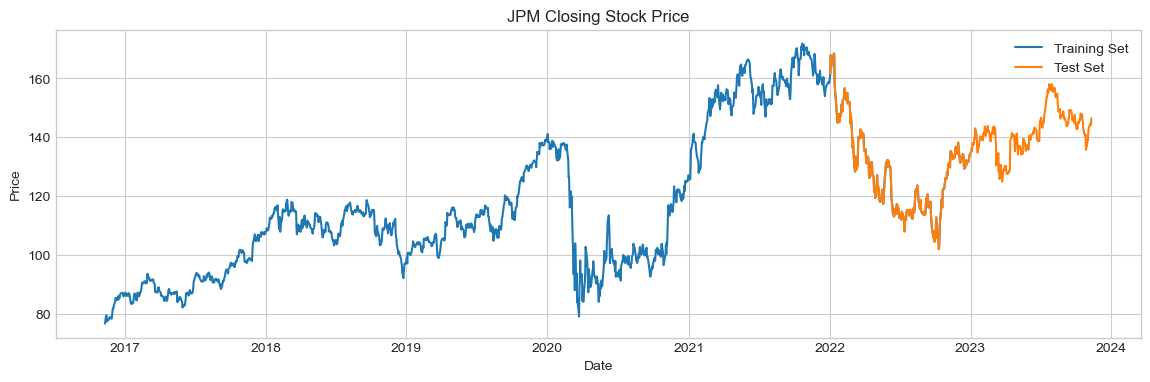

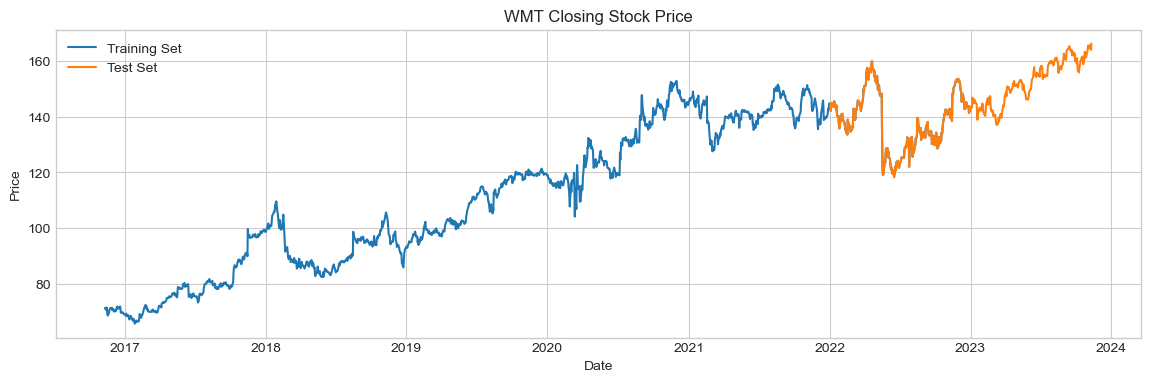

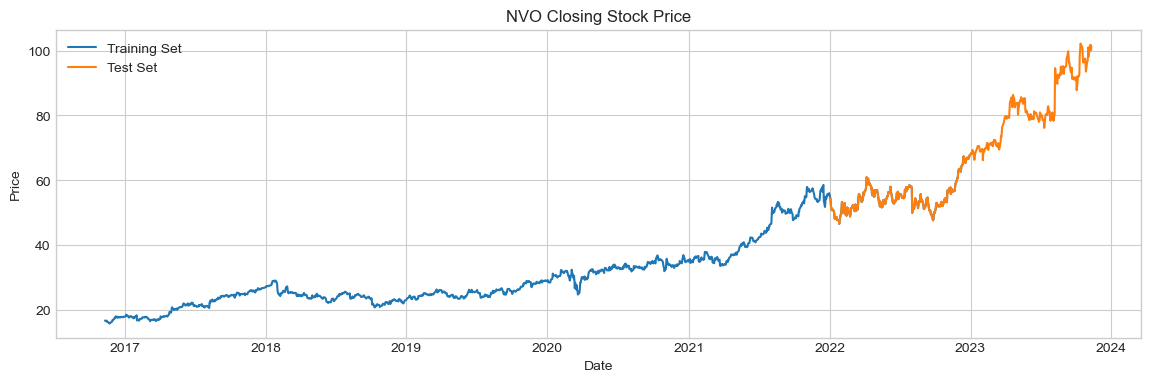

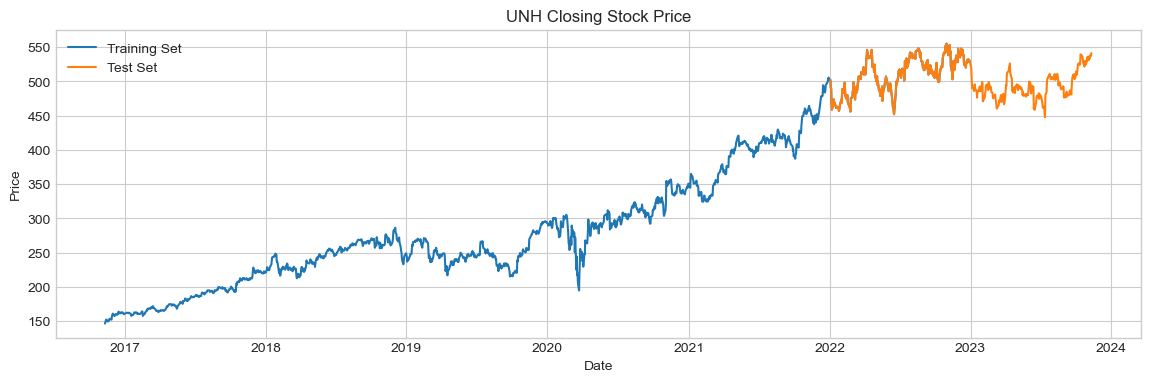

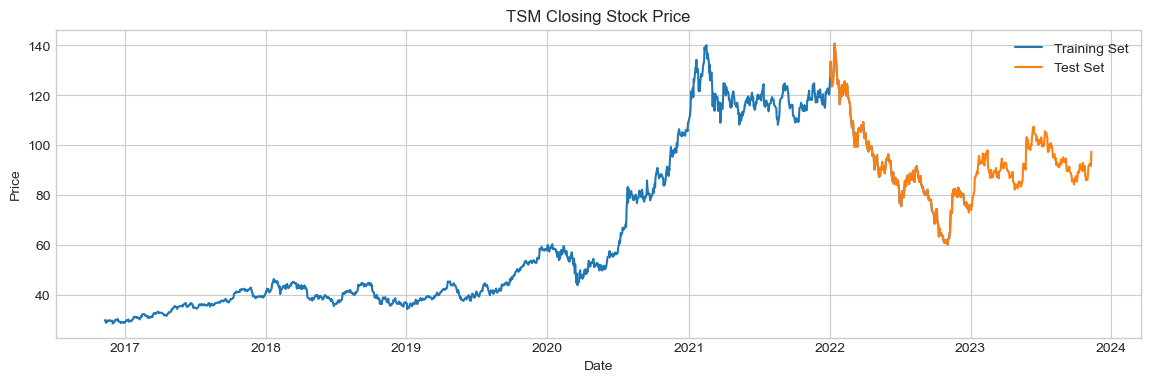

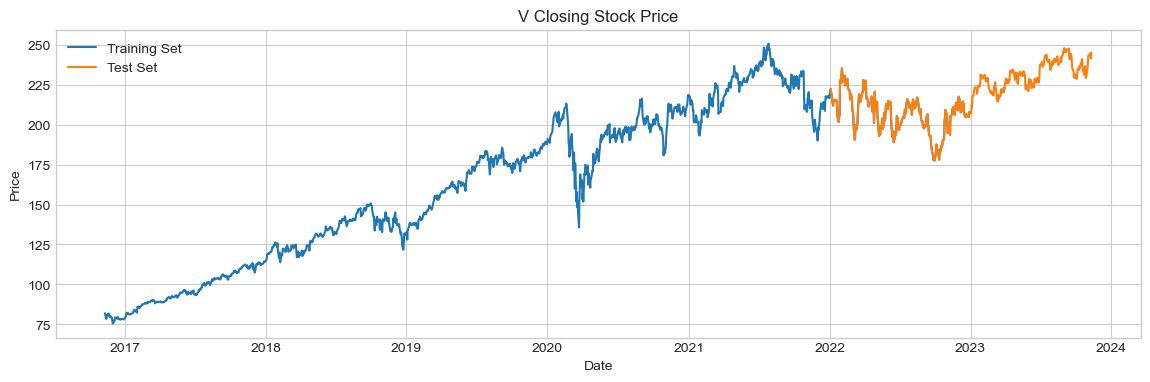

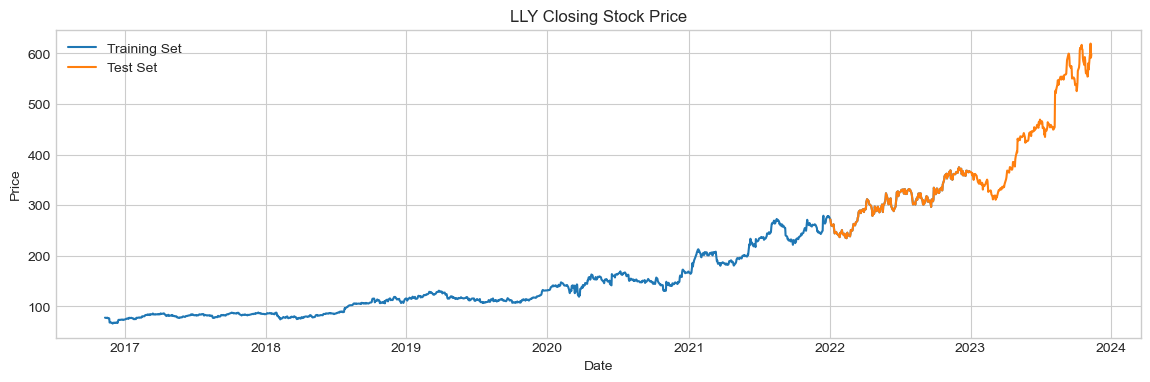

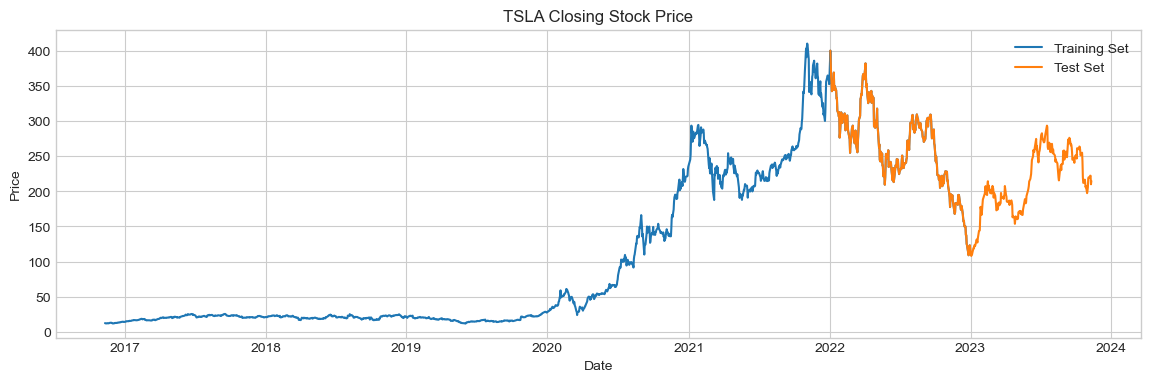

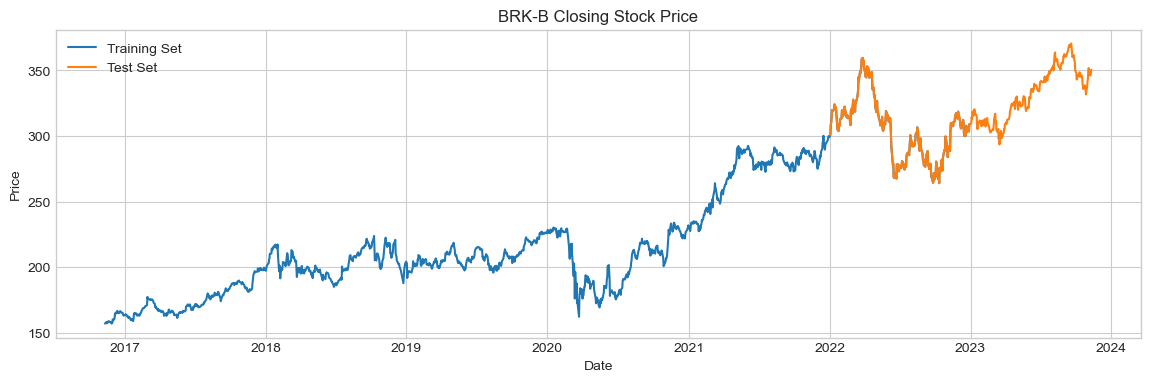

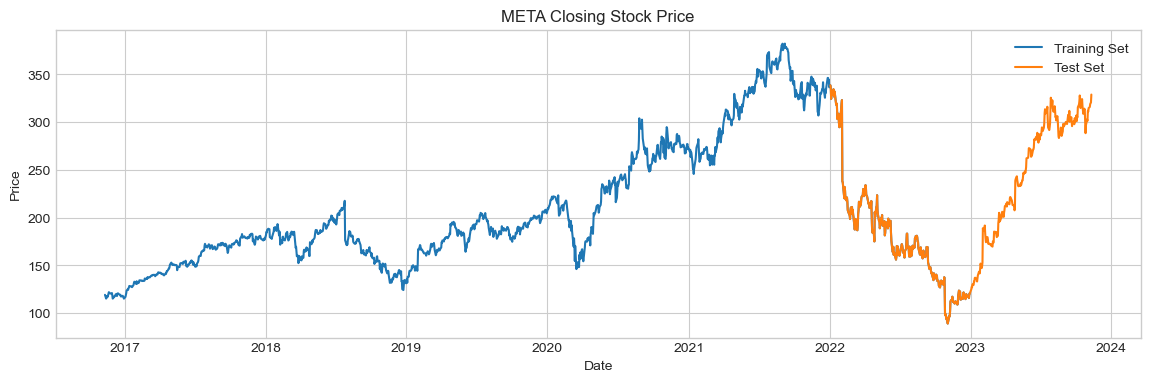

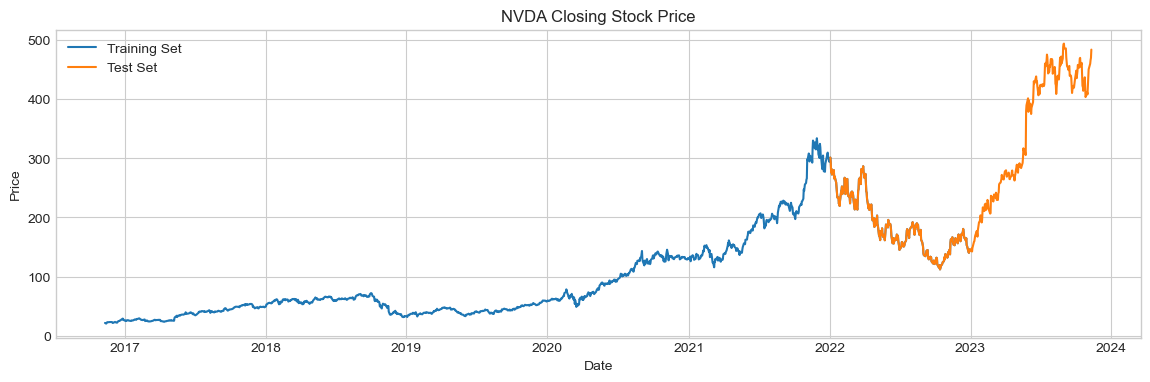

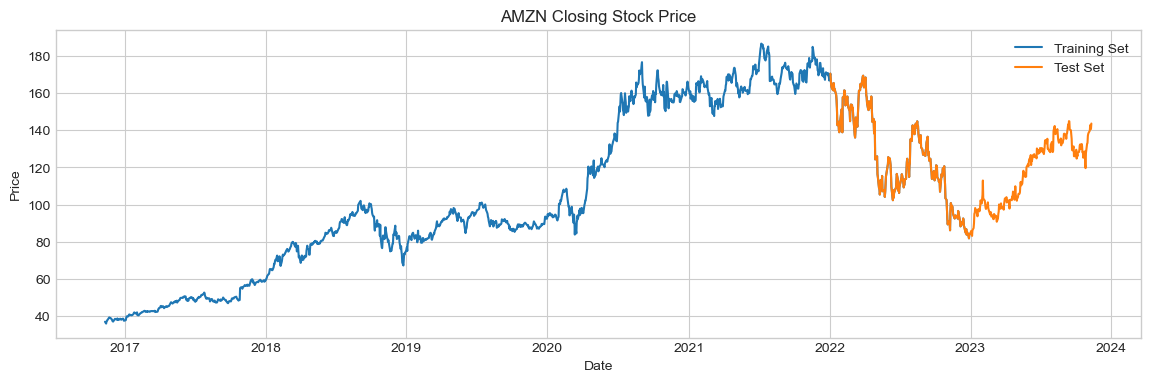

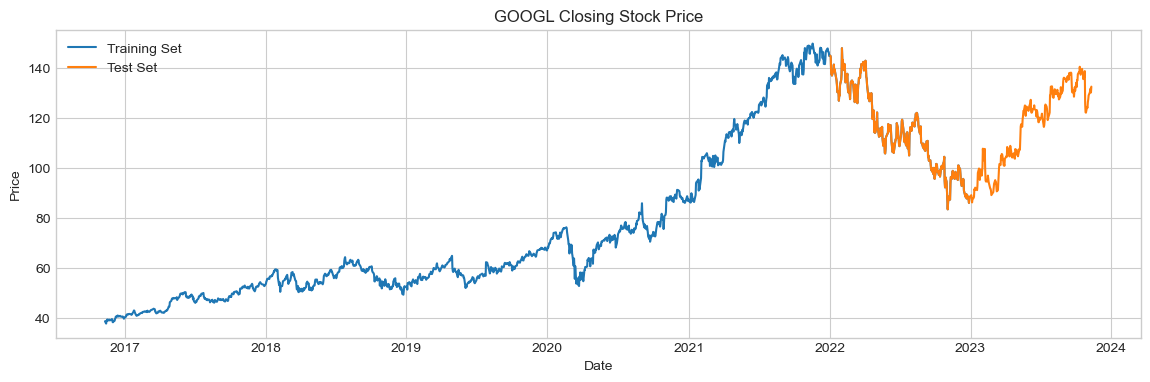

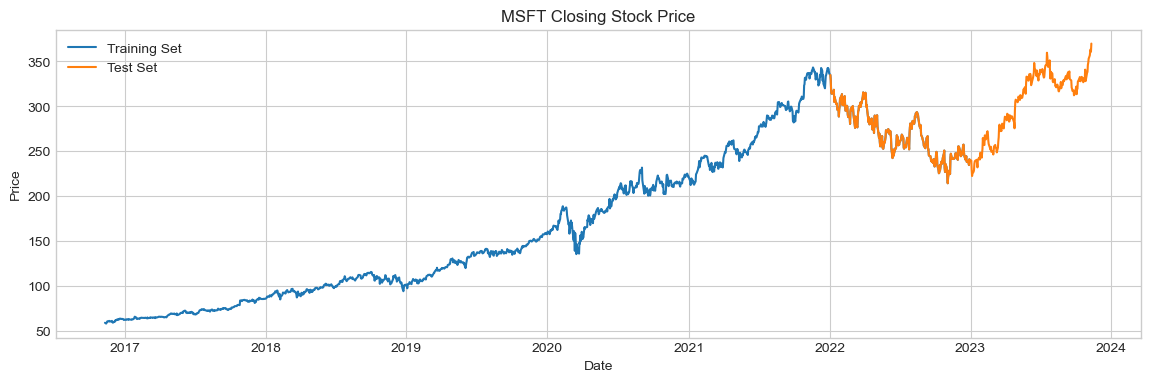

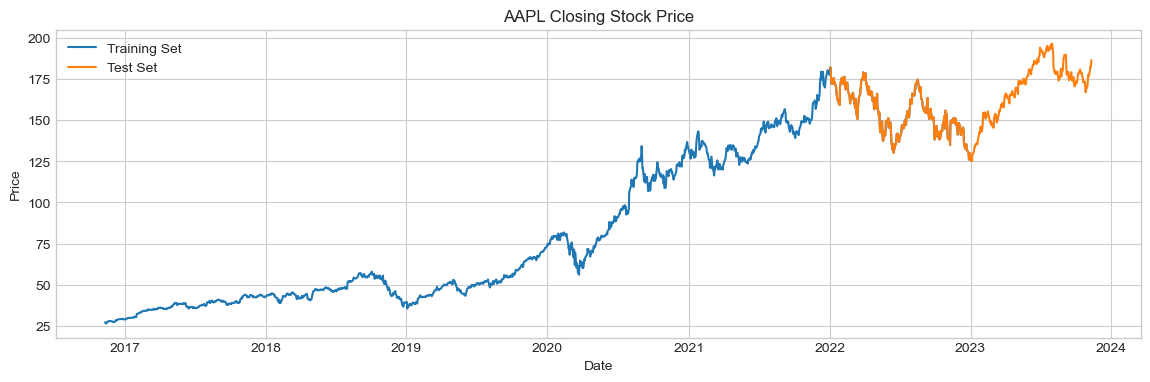

In [24]:
for i in stockList:
    plt.figure(figsize=(14,4))
    plt.plot(df_new[i]["Train"])
    plt.plot(df_new[i]["Test"])
    plt.ylabel("Price")
    plt.xlabel("Date")
    plt.legend(["Training Set", "Test Set"])
    plt.title(i + " Closing Stock Price")

In [25]:
# Scaling the training set
transform_train = {}
transform_test = {}
scaler = {}

for num, i in enumerate(stockList):
    sc = MinMaxScaler(feature_range=(0,1))
    a0 = np.array(df_new[i]["Train"])
    a1 = np.array(df_new[i]["Test"])
    a0 = a0.reshape(a0.shape[0],1)
    a1 = a1.reshape(a1.shape[0],1)
    transform_train[i] = sc.fit_transform(a0)
    transform_test[i] = sc.fit_transform(a1)
    scaler[i] = sc
    
del a0
del a1

In [26]:
for i in transform_train.keys():
    print(i, transform_train[i].shape)
print("\n")    
for i in transform_test.keys():
    print(i, transform_test[i].shape)

INTC (1544, 1)
PFE (1544, 1)
CMCSA (1544, 1)
SAP (1544, 1)
TMUS (1544, 1)
TMO (1544, 1)
AMD (1544, 1)
NVS (1544, 1)
LIN (1544, 1)
MCD (1544, 1)
NFLX (1544, 1)
AZN (1544, 1)
ACN (1544, 1)
CRM (1544, 1)
BABA (1544, 1)
FMX (1544, 1)
CSCO (1544, 1)
SHEL (1544, 1)
BAC (1544, 1)
PEP (1544, 1)
ABBV (1544, 1)
KO (1544, 1)
TM (1544, 1)
COST (1544, 1)
MRK (1544, 1)
ASML (1544, 1)
CVX (1544, 1)
ADBE (1544, 1)
HD (1544, 1)
ORCL (1544, 1)
JNJ (1544, 1)
PG (1544, 1)
MA (1544, 1)
AVGO (1544, 1)
XOM (1544, 1)
JPM (1544, 1)
WMT (1544, 1)
NVO (1544, 1)
UNH (1544, 1)
TSM (1544, 1)
V (1544, 1)
LLY (1544, 1)
TSLA (1544, 1)
BRK-B (1544, 1)
META (1544, 1)
NVDA (1544, 1)
AMZN (1544, 1)
GOOGL (1544, 1)
MSFT (1544, 1)
AAPL (1544, 1)


INTC (468, 1)
PFE (468, 1)
CMCSA (468, 1)
SAP (468, 1)
TMUS (468, 1)
TMO (468, 1)
AMD (468, 1)
NVS (468, 1)
LIN (468, 1)
MCD (468, 1)
NFLX (468, 1)
AZN (468, 1)
ACN (468, 1)
CRM (468, 1)
BABA (468, 1)
FMX (468, 1)
CSCO (468, 1)
SHEL (468, 1)
BAC (468, 1)
PEP (468, 1)
ABBV (468, 1)

In [29]:
trainset = {}
testset = {}
for j in stockList:
    trainset[j] = {}
    X_train = []
    y_train = []
    for i in range(60,1544):
        X_train.append(transform_train[j][i-60:i,0])
        y_train.append(transform_train[j][i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    trainset[j]["X"] = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
    trainset[j]["y"] = y_train
    
    testset[j] = {}
    X_test = []
    y_test = []    
    for i in range(60, 468):
        X_test.append(transform_test[j][i-60:i,0])
        y_test.append(transform_test[j][i,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset[j]["X"] = np.reshape(X_test, (X_test.shape[0], X_train.shape[1], 1))
    testset[j]["y"] = y_test

In [30]:
arr_buff = []
for i in stockList:
    buff = {}
    buff["X_train"] = trainset[i]["X"].shape
    buff["y_train"] = trainset[i]["y"].shape
    buff["X_test"] = testset[i]["X"].shape
    buff["y_test"] = testset[i]["y"].shape
    arr_buff.append(buff)

pd.DataFrame(arr_buff, index=stockList)

X_train  y_train        X_test  y_test
INTC   (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
PFE    (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
CMCSA  (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
SAP    (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
TMUS   (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
TMO    (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
AMD    (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
NVS    (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
LIN    (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
MCD    (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
NFLX   (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
AZN    (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
ACN    (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
CRM    (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
BABA   (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
FMX    (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
CSCO   (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
SHEL   (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
BAC    (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
PEP    (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
ABBV   (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
KO     (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
TM     (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
COST   (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
MRK    (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
ASML   (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
CVX    (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
ADBE   (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
HD     (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
ORCL   (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
JNJ    (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
PG     (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
MA     (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
AVGO   (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
XOM    (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
JPM    (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
WMT    (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
NVO    (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
UNH    (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
TSM    (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
V      (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
LLY    (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
TSLA   (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
BRK-B  (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
META   (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
NVDA   (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
AMZN   (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
GOOGL  (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
MSFT   (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)
AAPL   (1484, 60, 1)  (1484,)  (408, 60, 1)  (408,)

In [31]:
%%time
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.5))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.5))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop', loss='mean_squared_error')
# Fitting to the training set
for i in stockList:
    print("Fitting to", i)
    regressor.fit(trainset[i]["X"], trainset[i]["y"], epochs=10, batch_size=200)

2023-11-11 17:57:31.476794: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Fitting to INTC
Epoch 1/10


2023-11-11 17:57:33.450845: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


8/8 [==============================] - 9s 227ms/step - loss: 0.1108
Epoch 2/10
8/8 [==============================] - 2s 194ms/step - loss: 0.0243
Epoch 3/10
8/8 [==============================] - 2s 206ms/step - loss: 0.0297
Epoch 4/10
8/8 [==============================] - 2s 232ms/step - loss: 0.0287
Epoch 5/10
8/8 [==============================] - 2s 231ms/step - loss: 0.0277
Epoch 6/10
8/8 [==============================] - 2s 202ms/step - loss: 0.0228
Epoch 7/10
8/8 [==============================] - 2s 192ms/step - loss: 0.0245
Epoch 8/10
8/8 [==============================] - 2s 198ms/step - loss: 0.0245
Epoch 9/10
8/8 [==============================] - 2s 196ms/step - loss: 0.0212
Epoch 10/10
8/8 [==============================] - 2s 195ms/step - loss: 0.0165
Fitting to PFE
Epoch 1/10
8/8 [==============================] - 2s 261ms/step - loss: 0.0107
Epoch 2/10
8/8 [==============================] - 2s 252ms/step - loss: 0.0119
Epoch 3/10
8/8 [==============================]

/var/folders/tt/rynv9sfx6hd7zsm3w8y6qv8c0000gn/T/ipykernel_4479/335450893.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14,6))


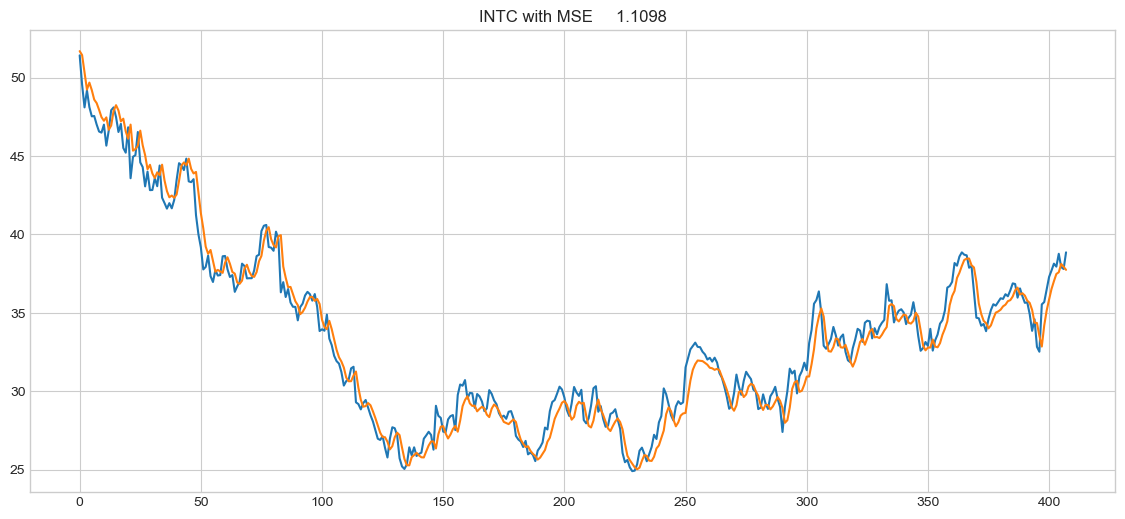

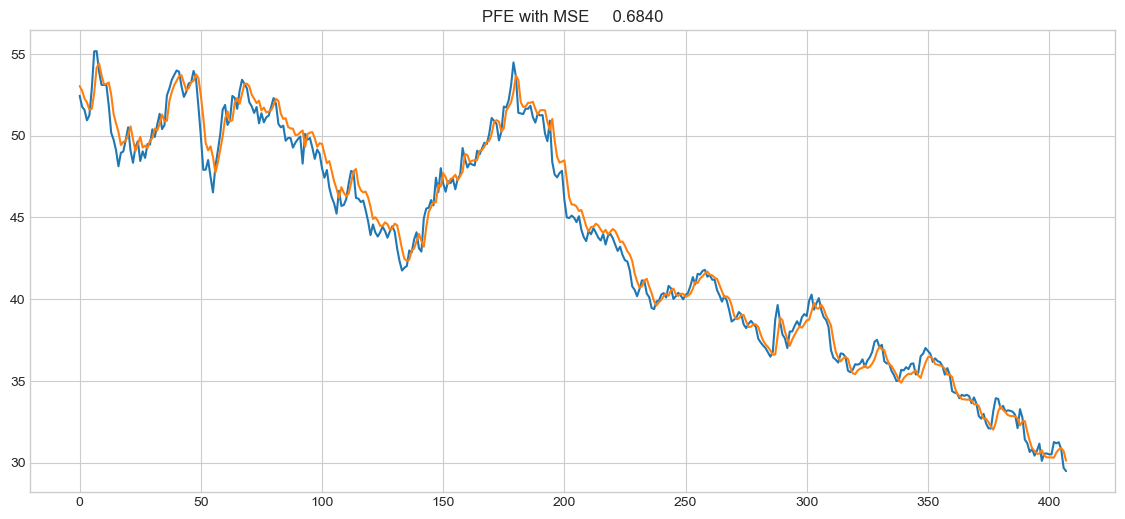

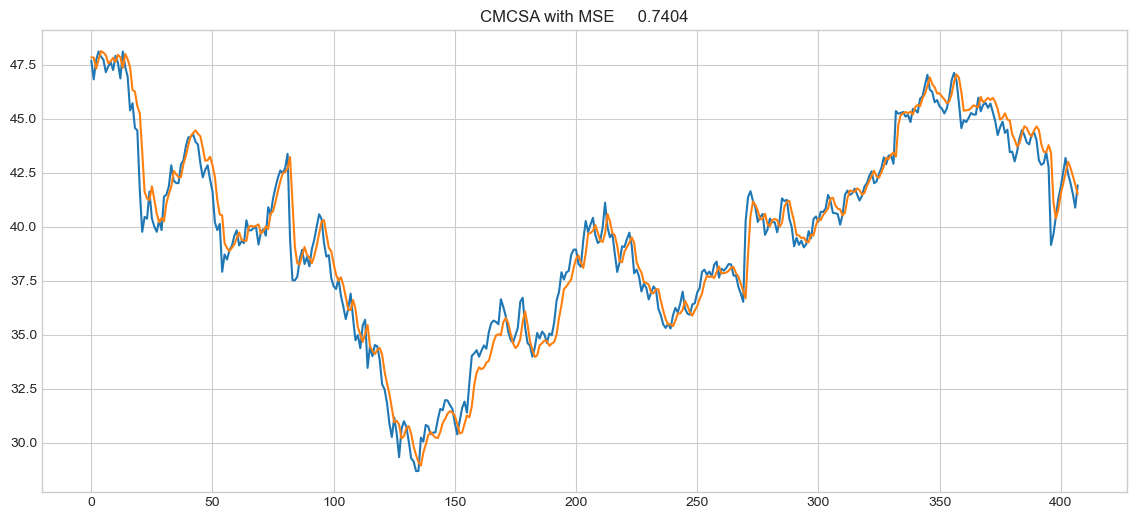

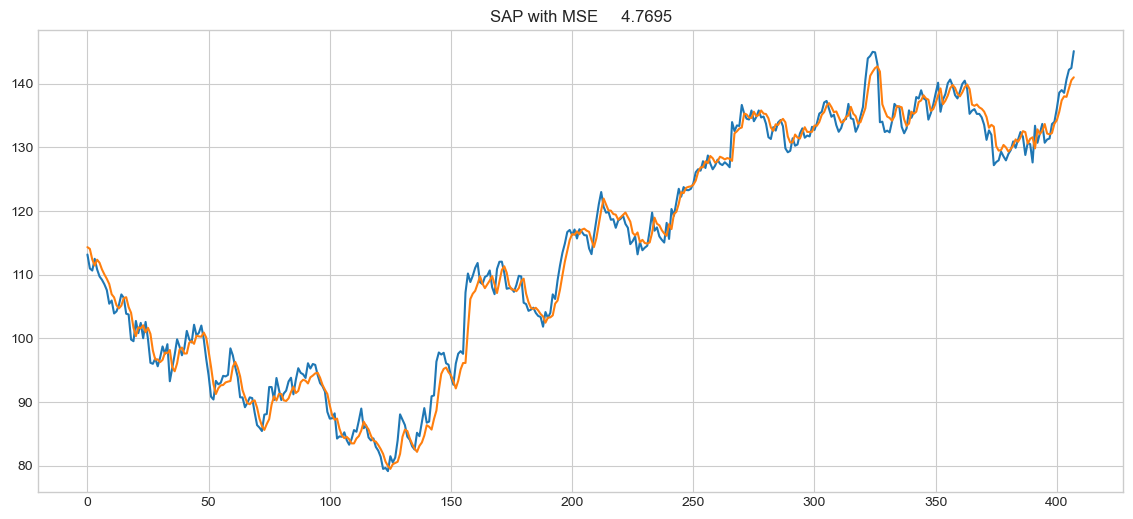

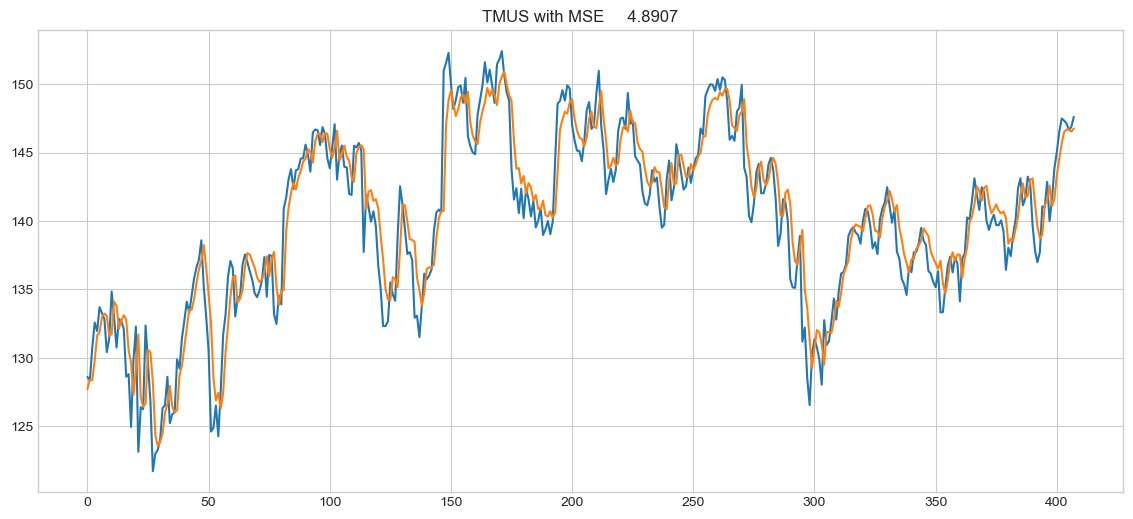

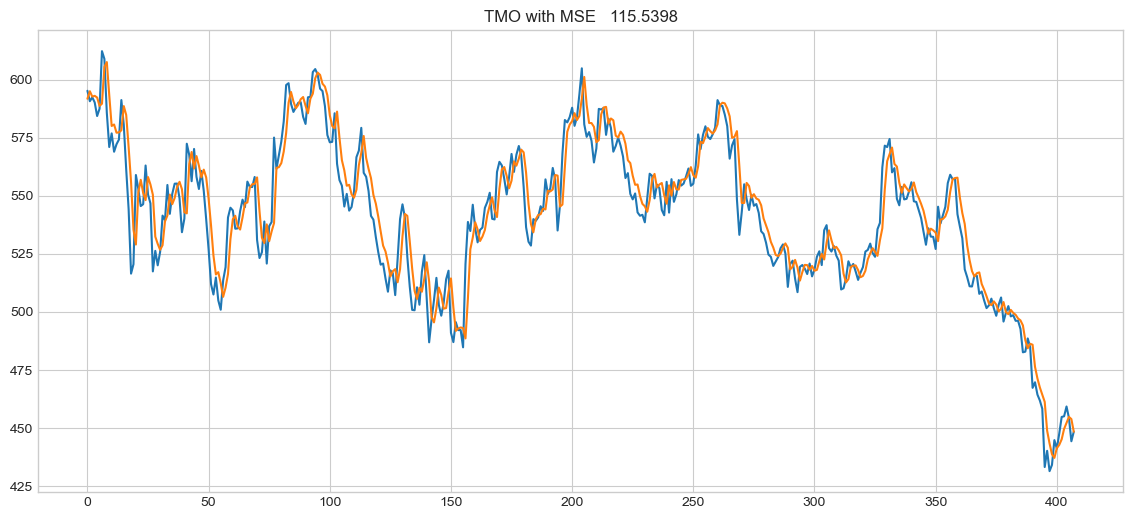

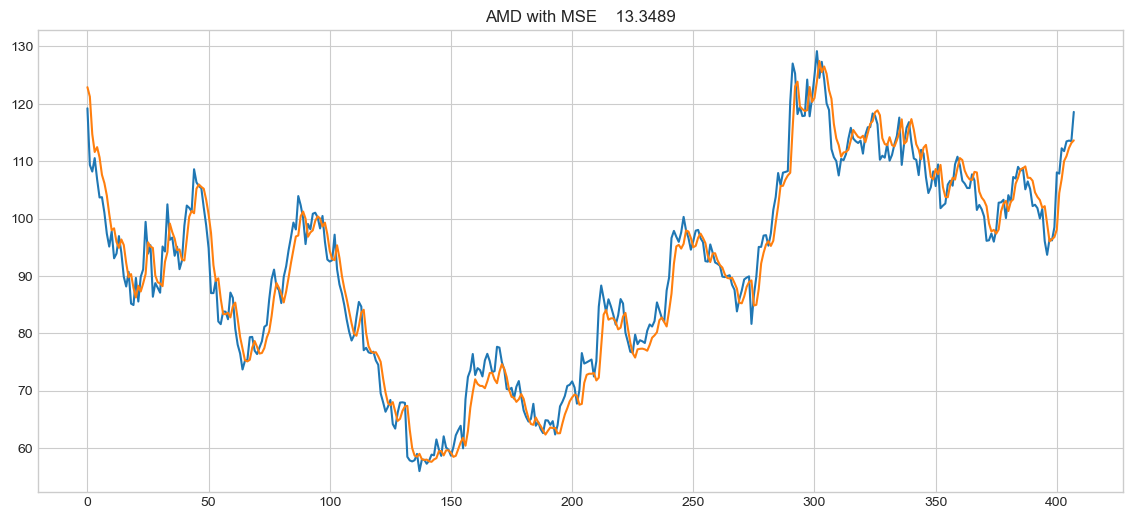

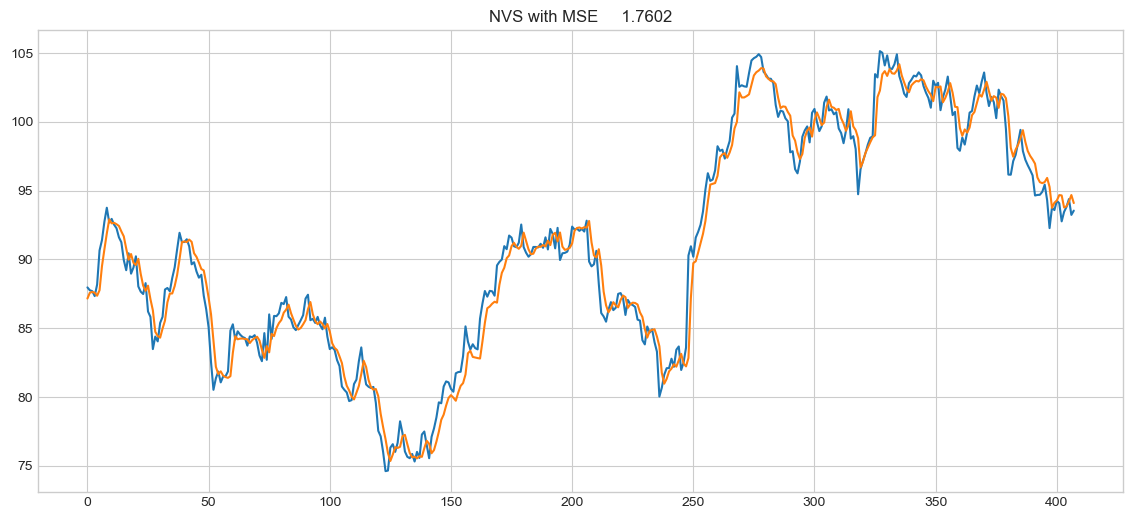

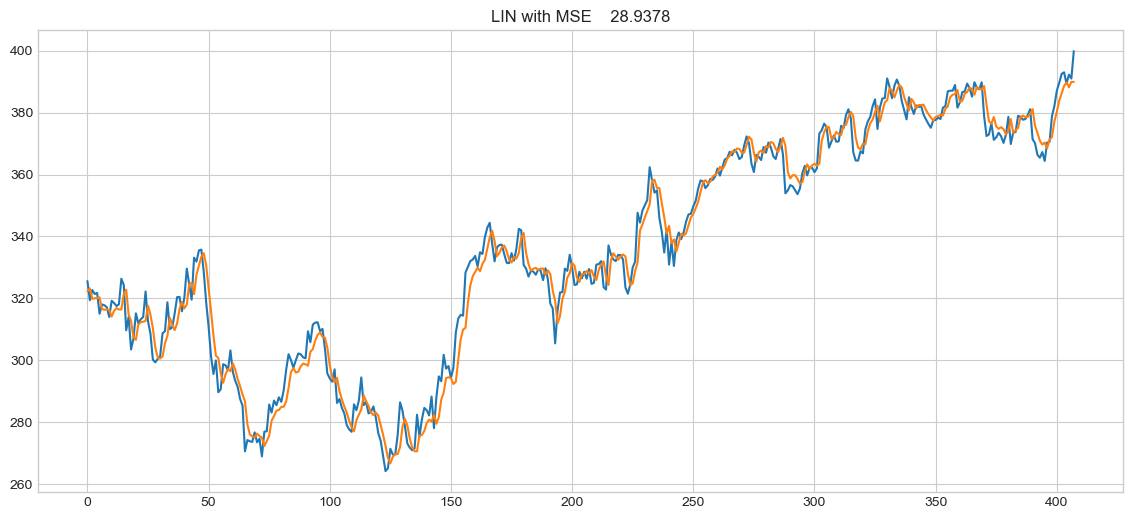

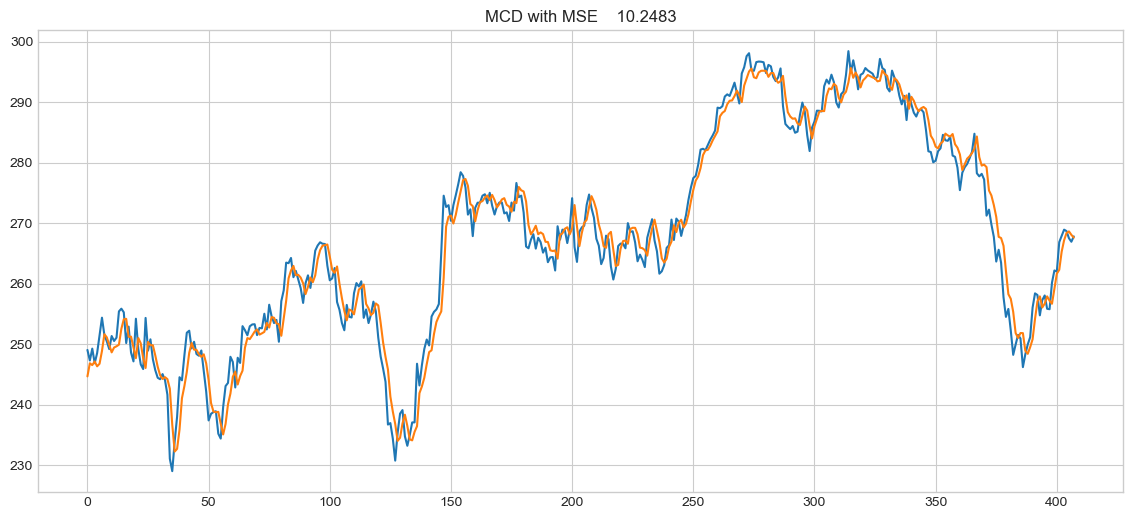

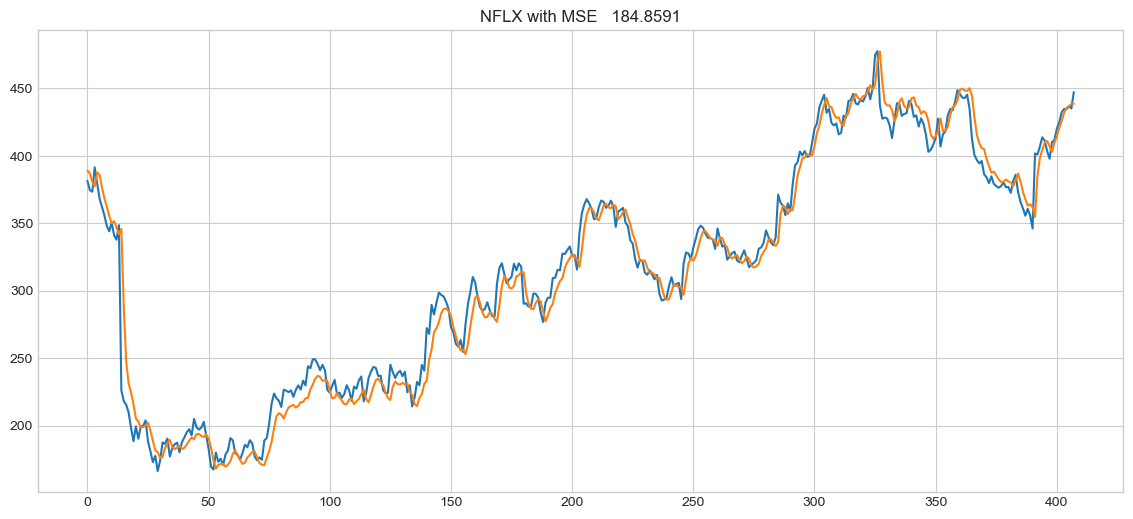

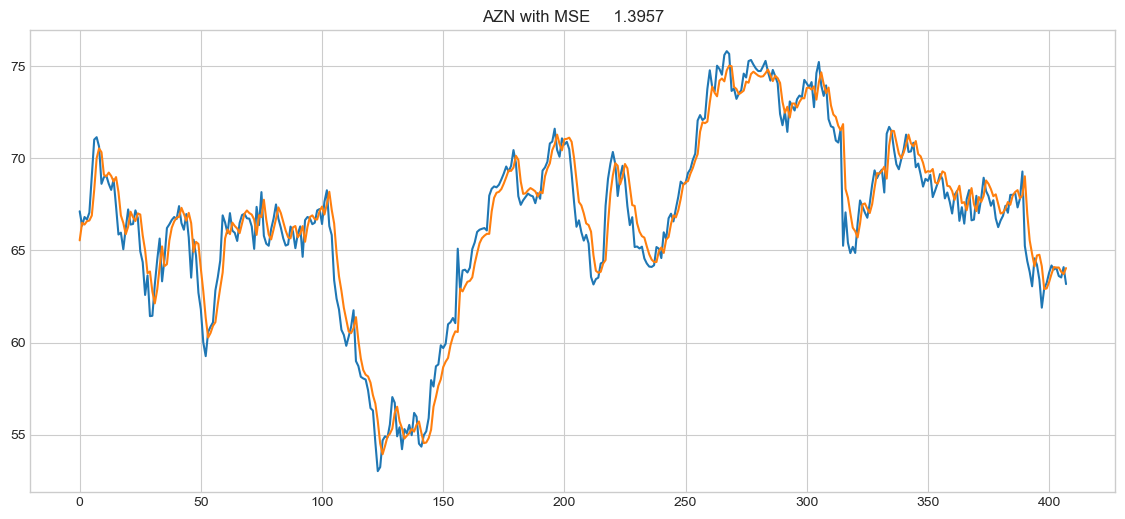

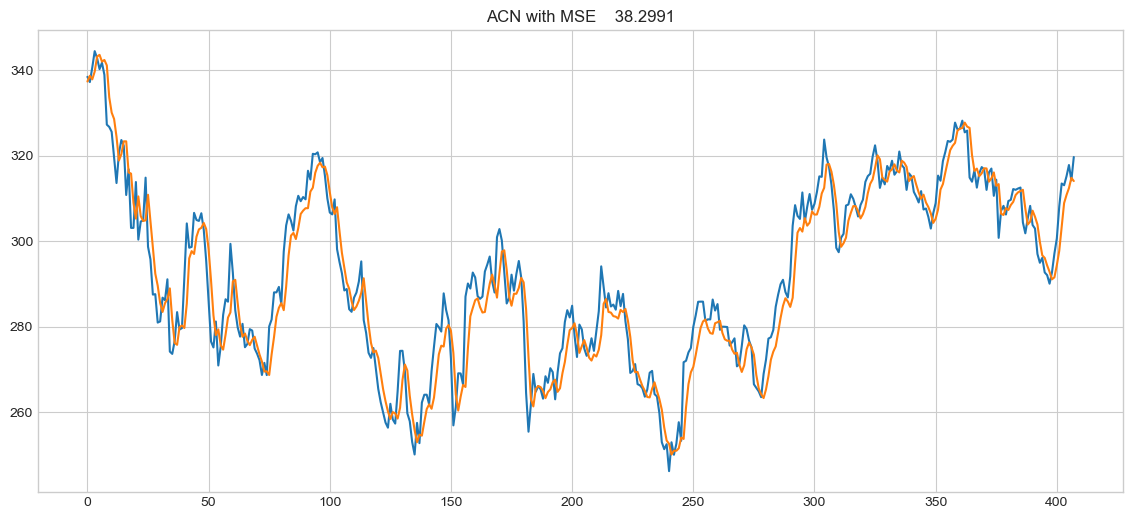

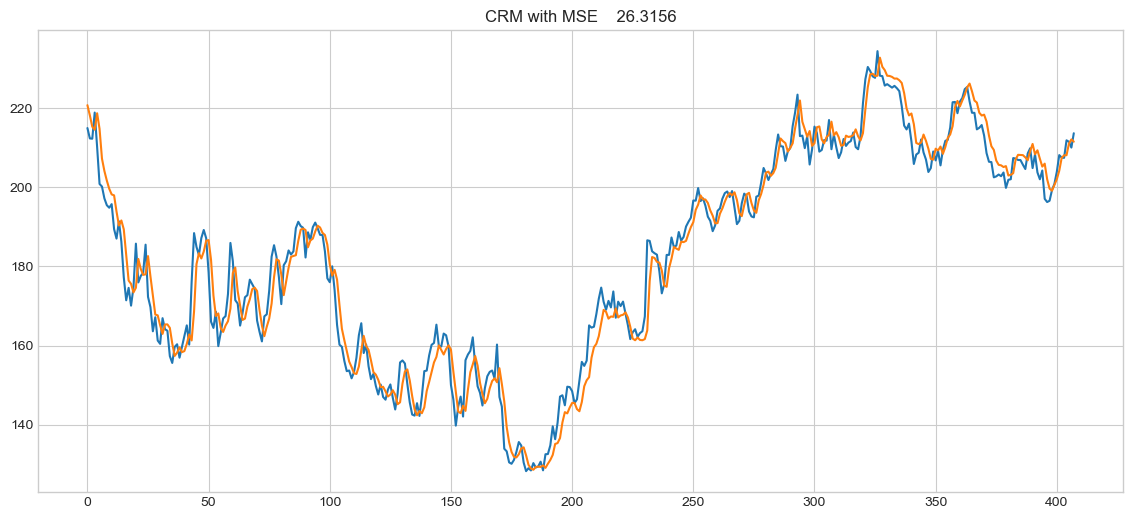

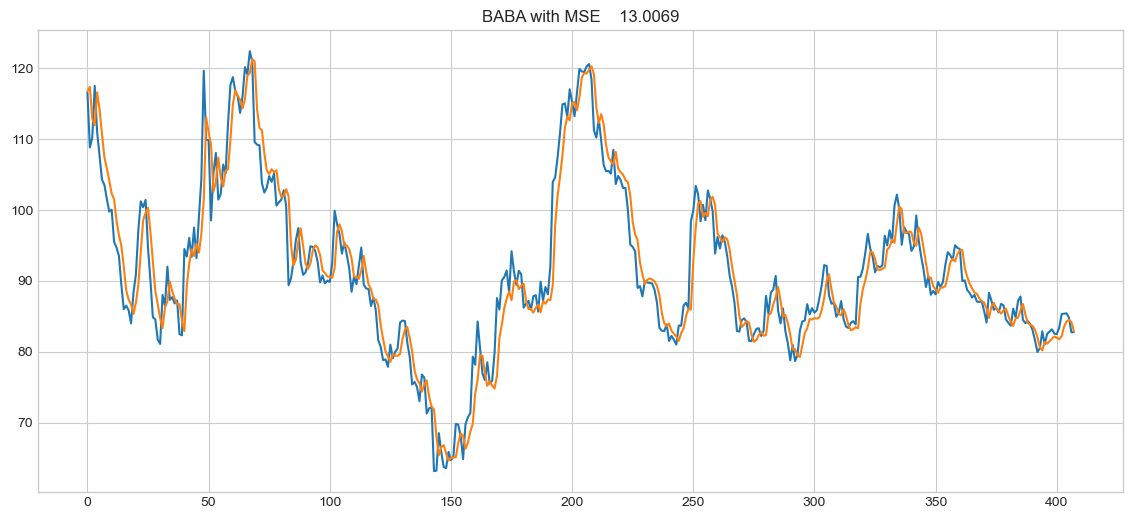

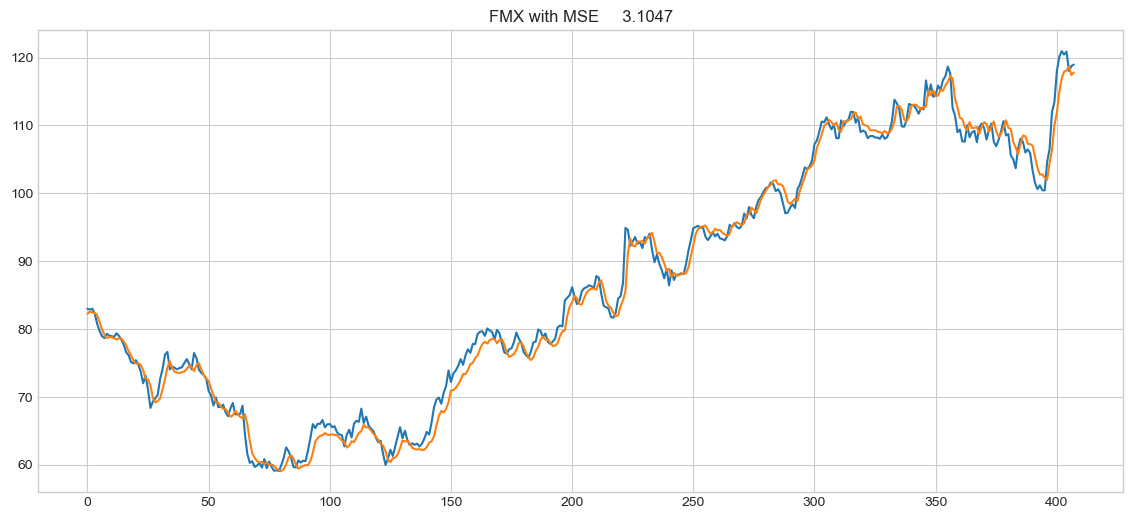

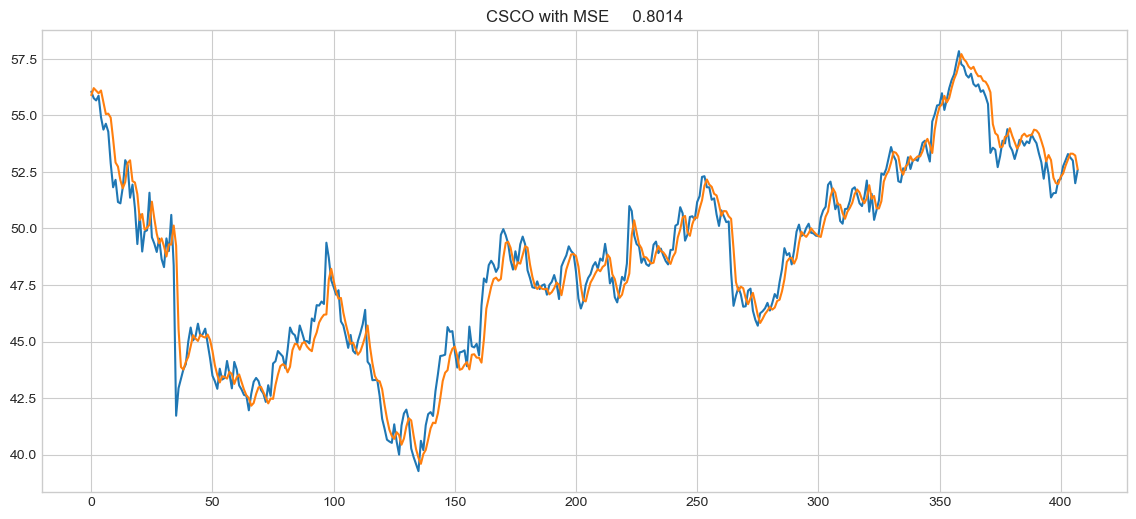

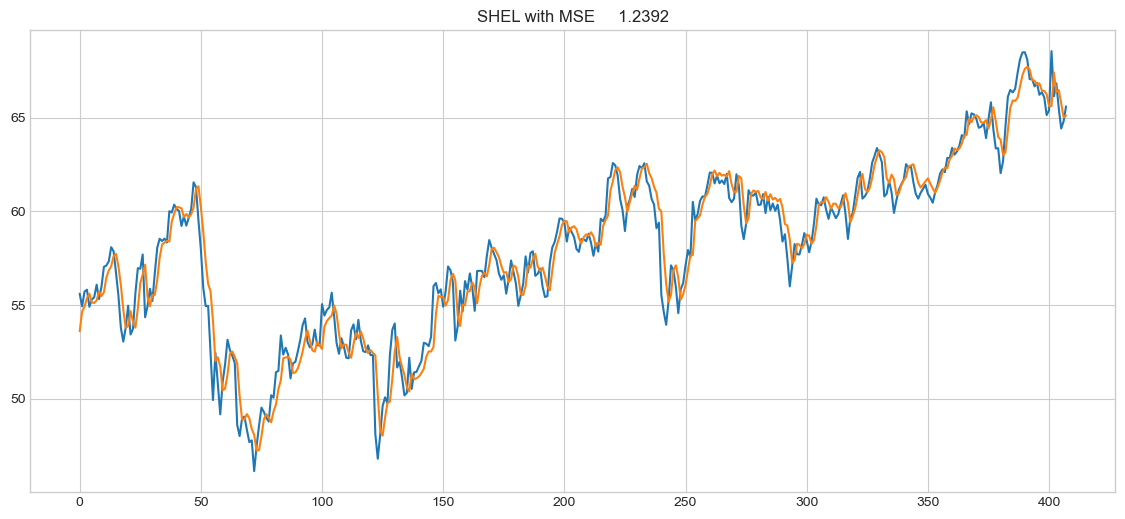

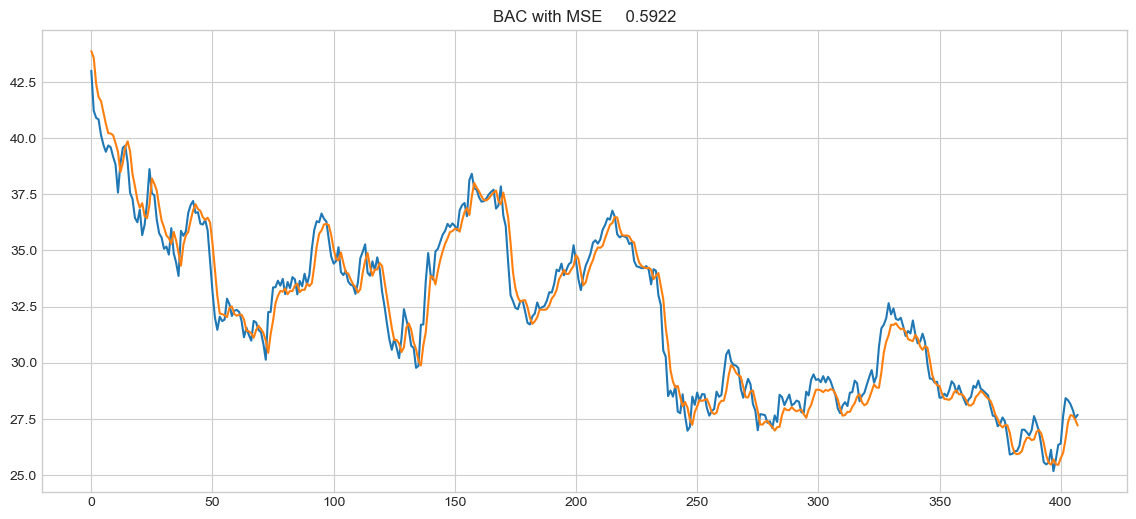

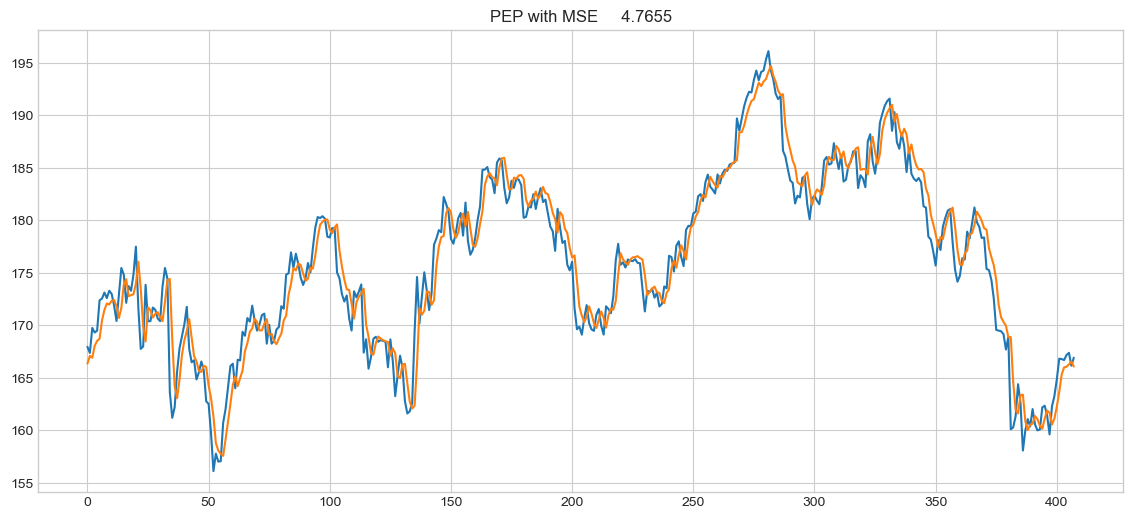

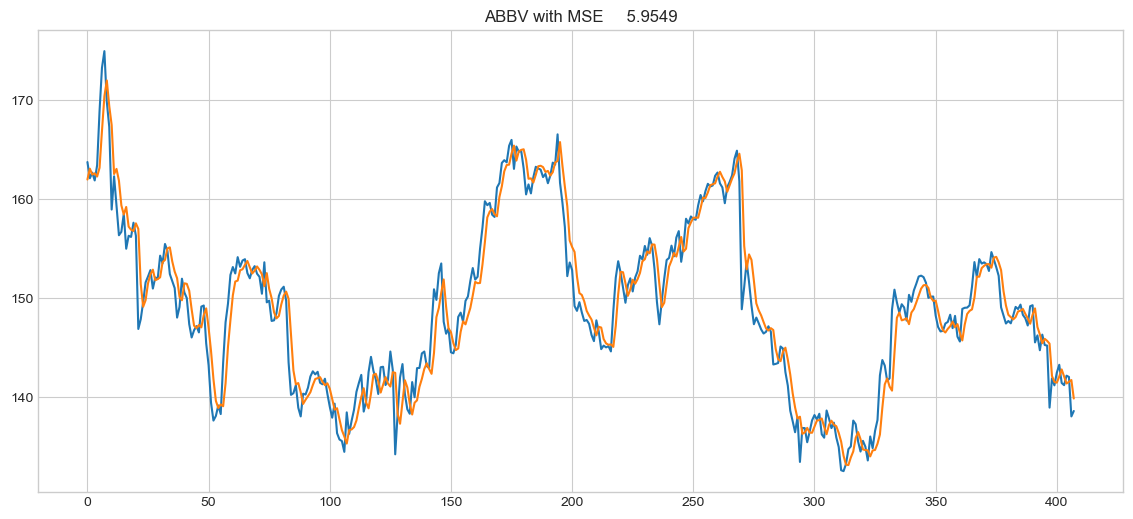

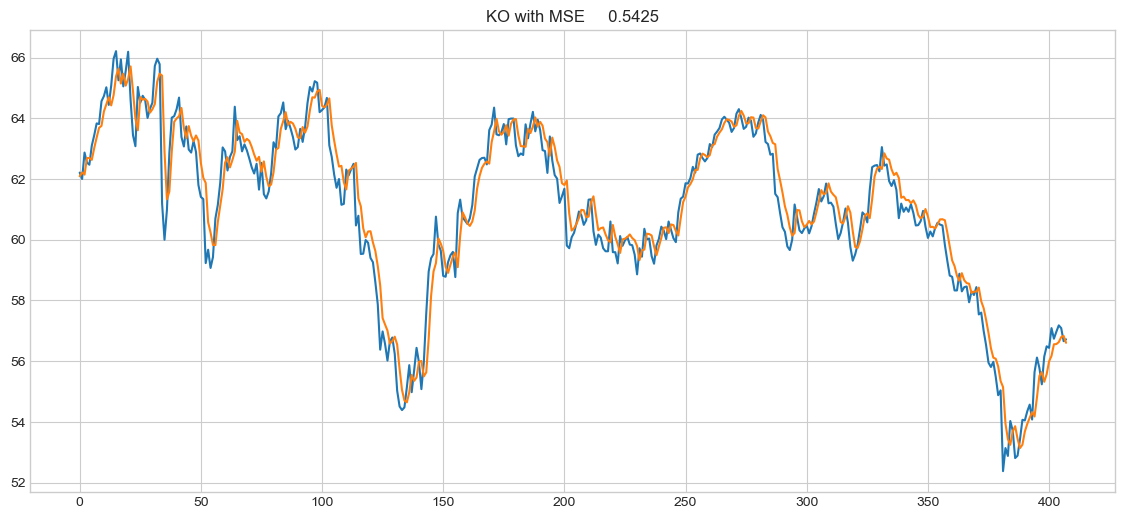

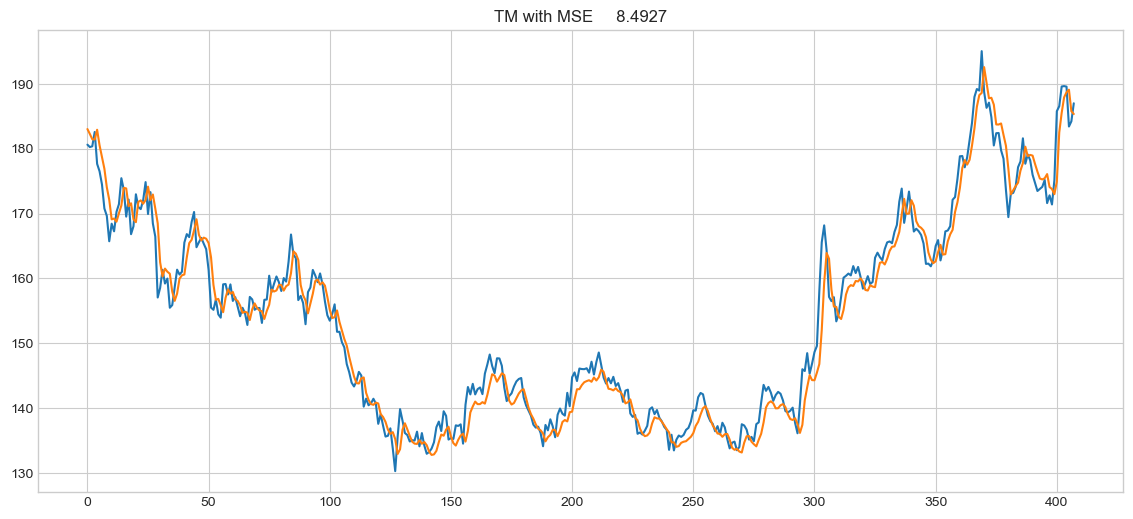

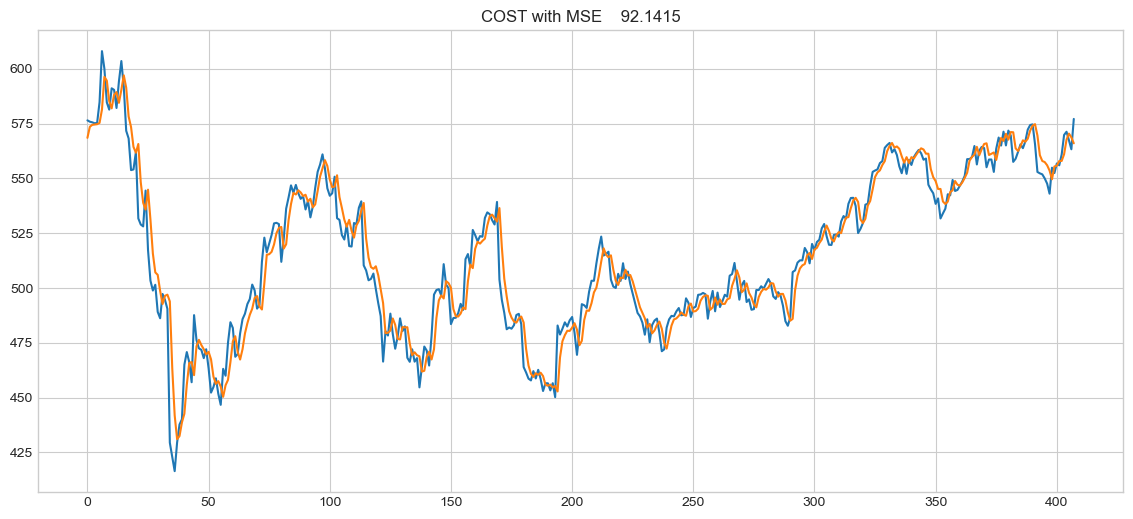

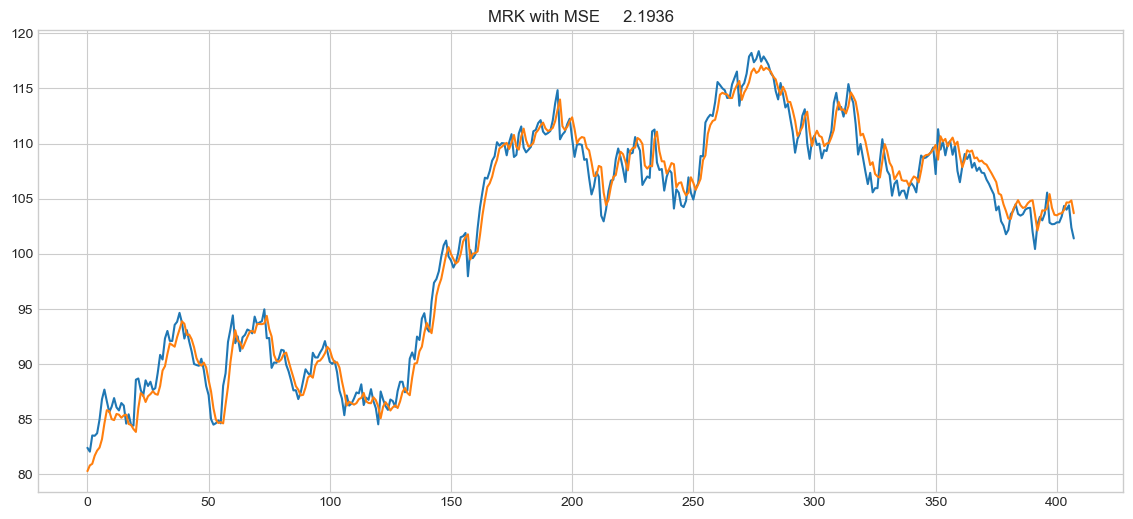

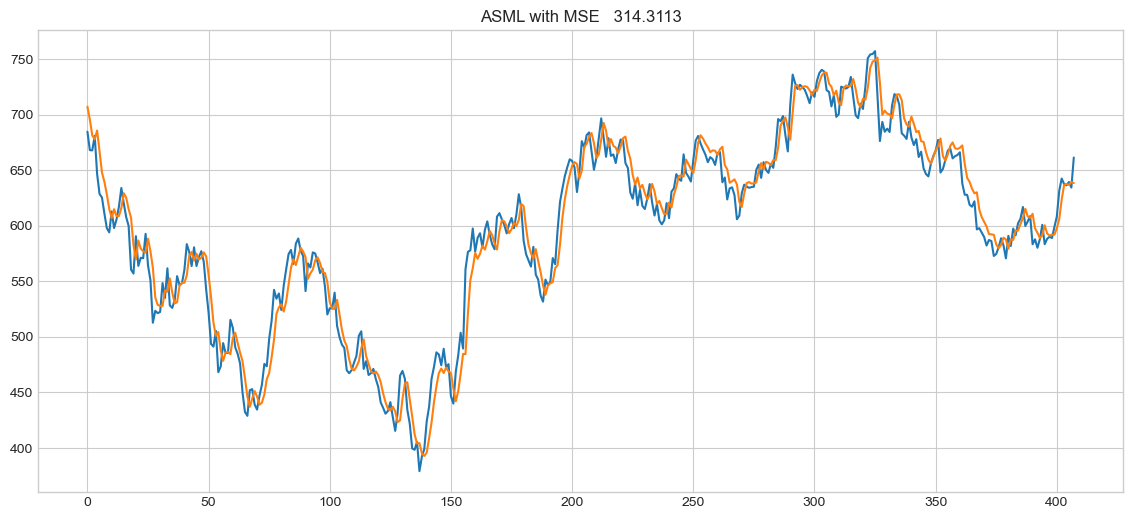

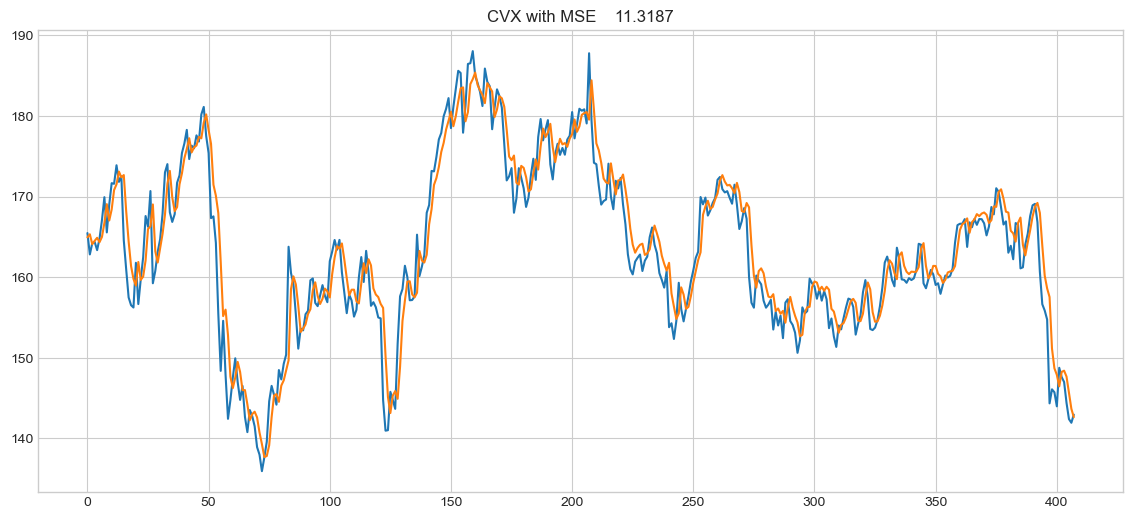

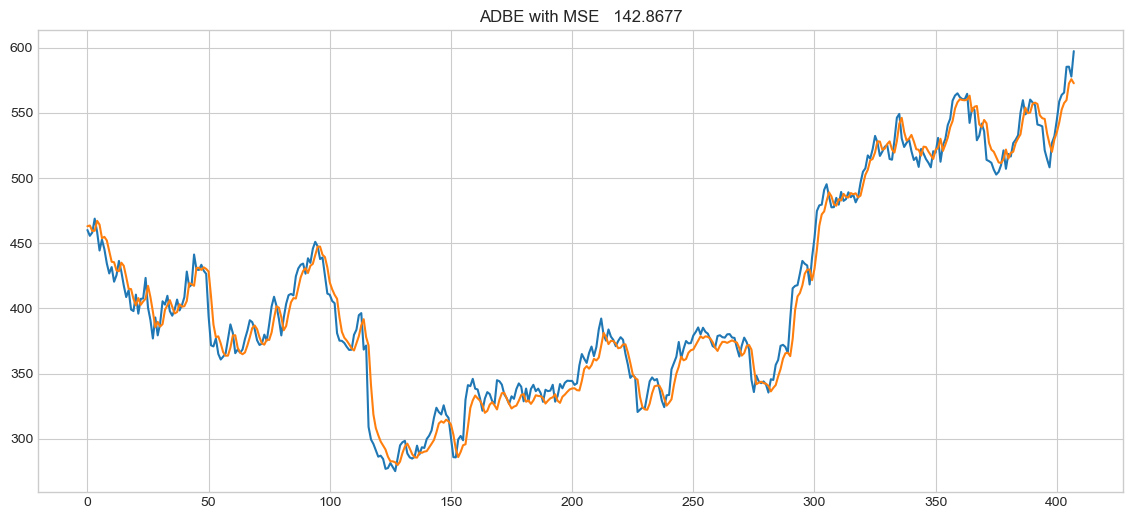

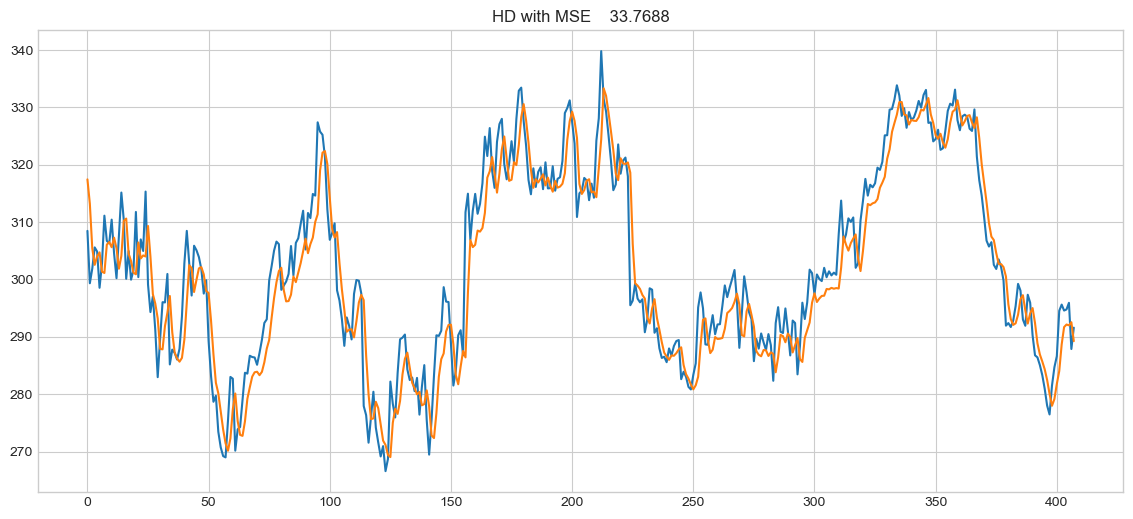

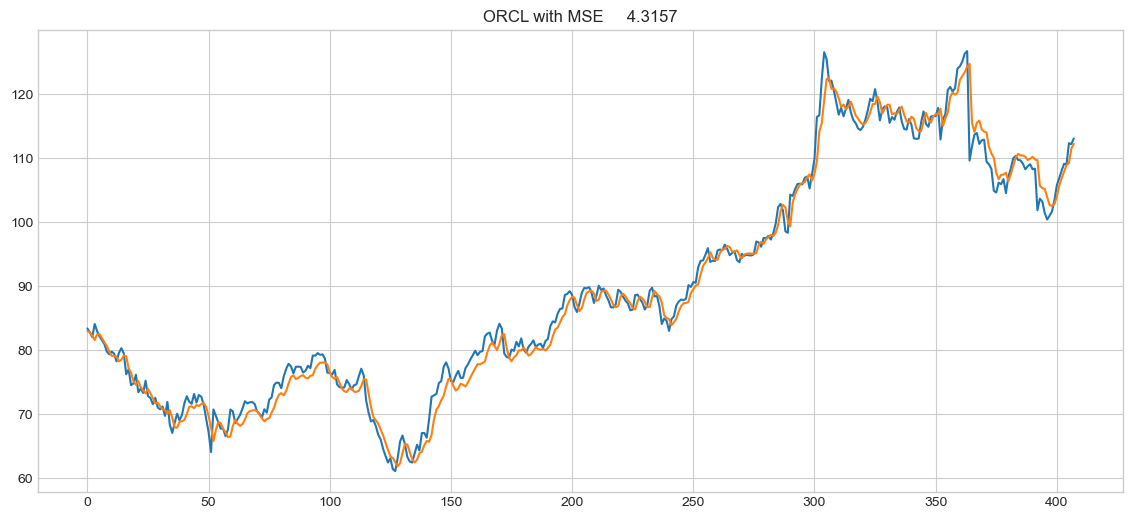

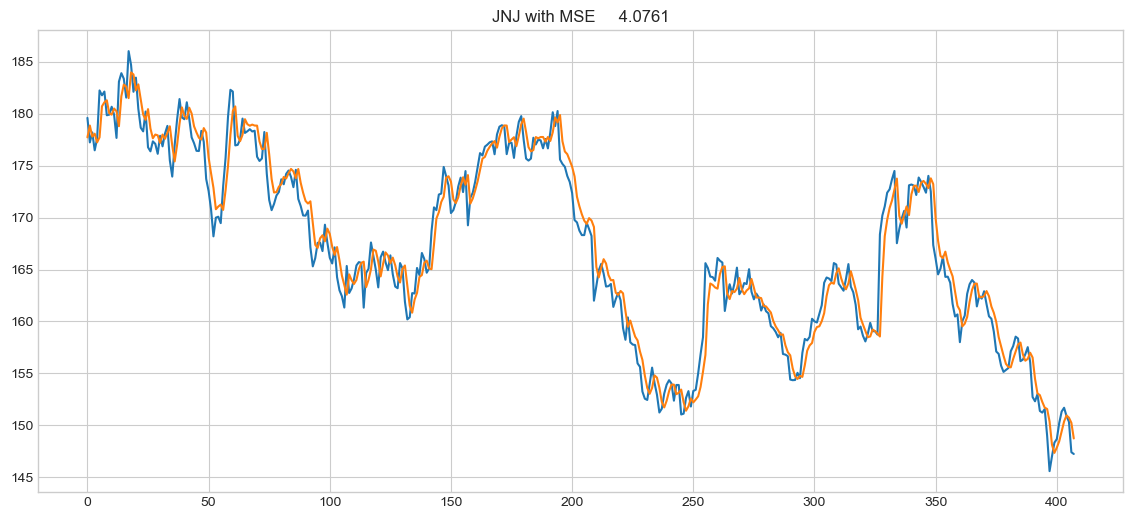

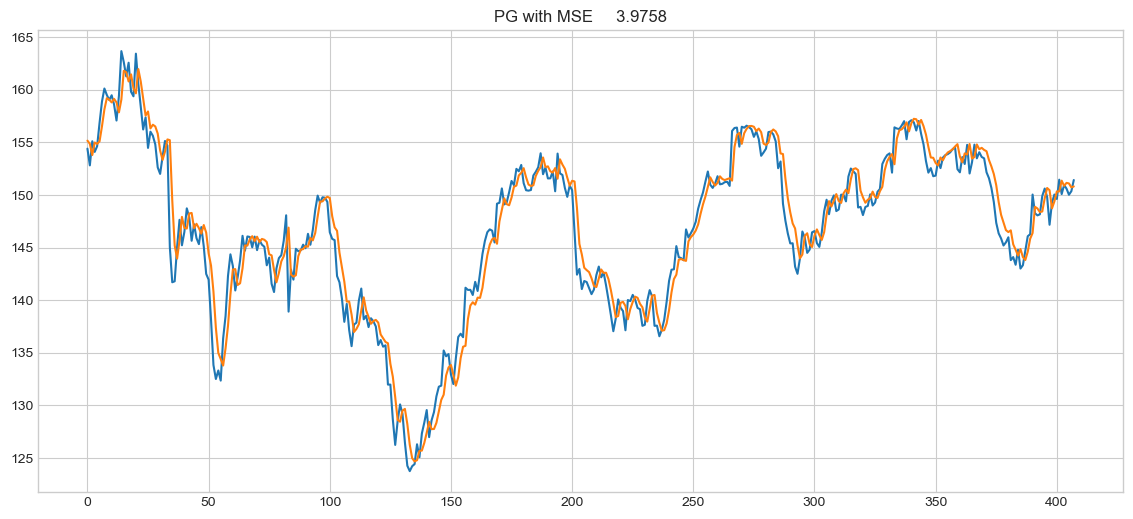

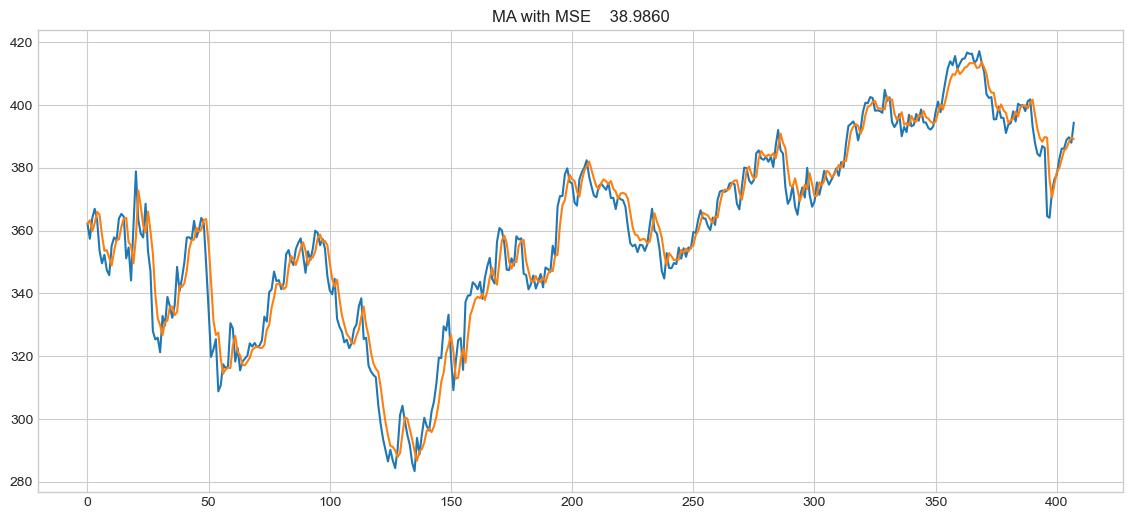

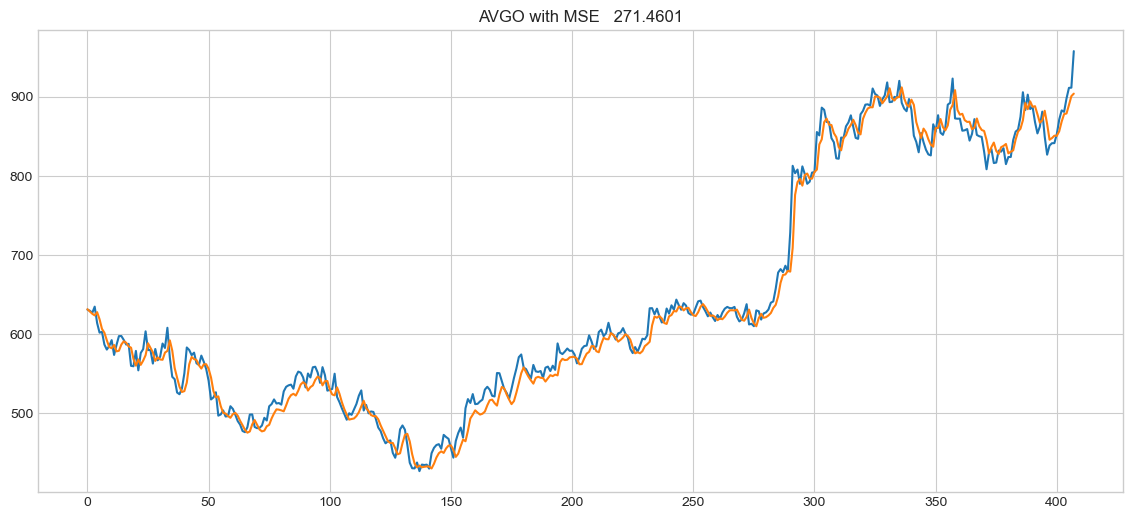

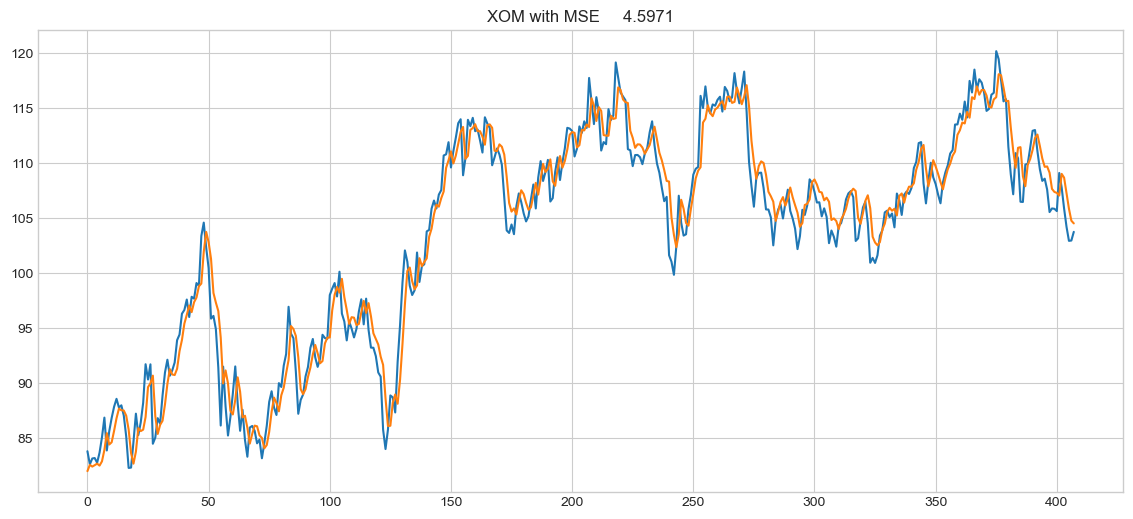

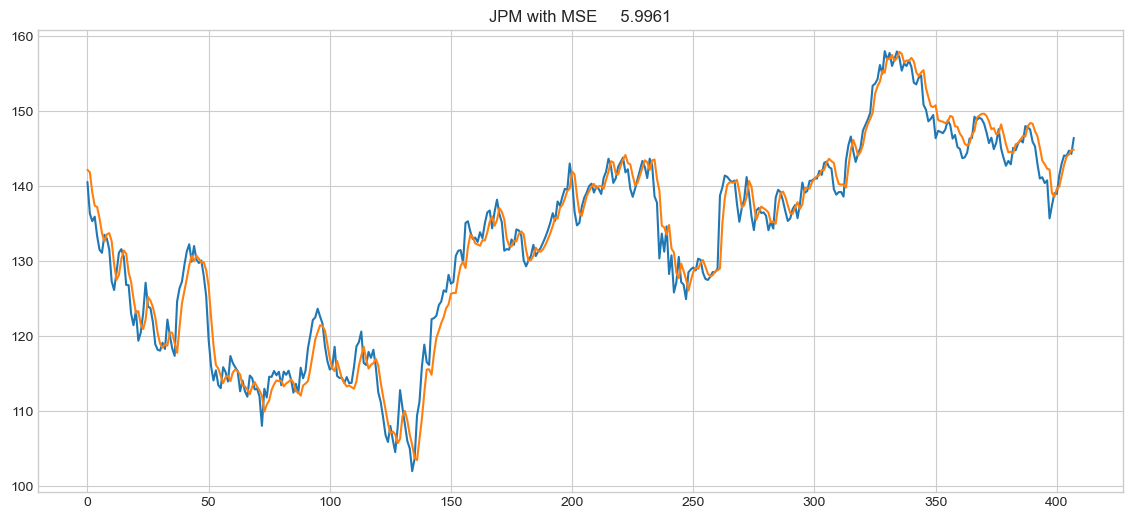

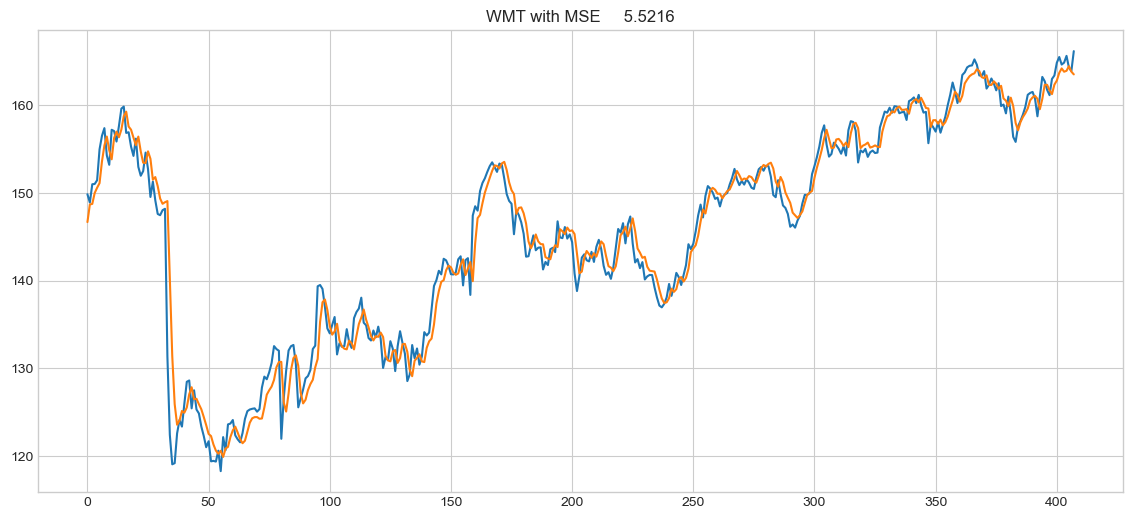

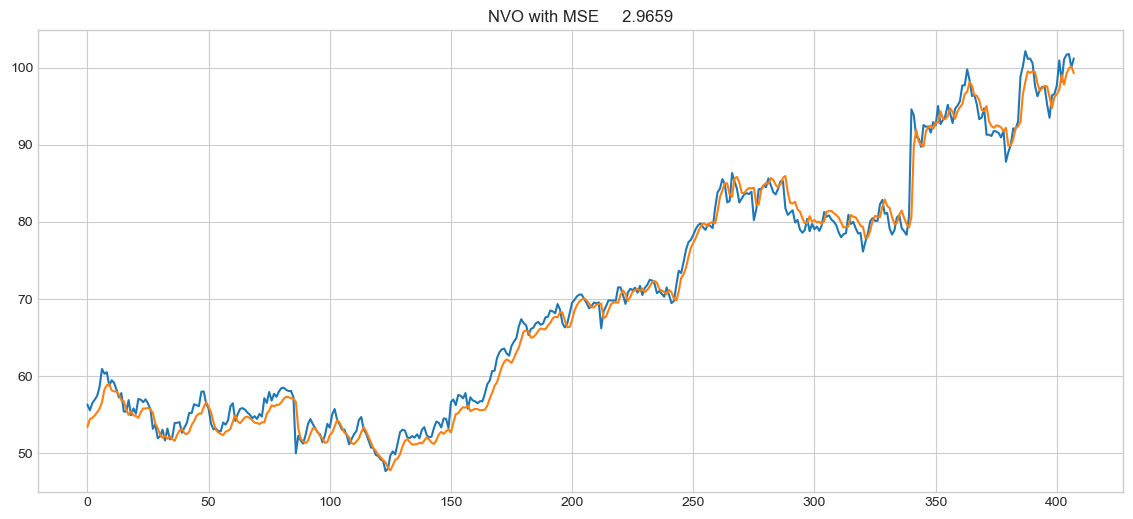

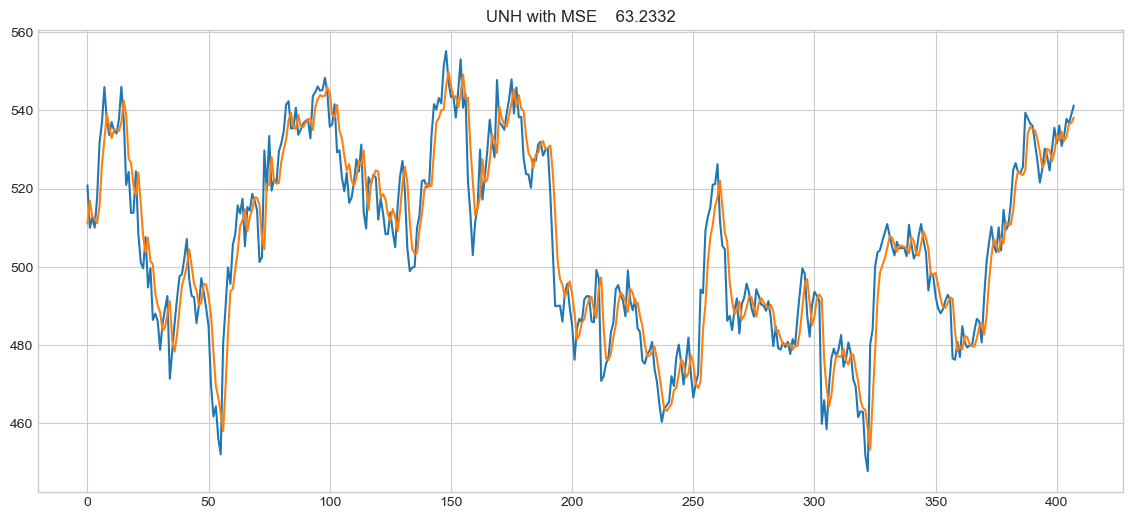

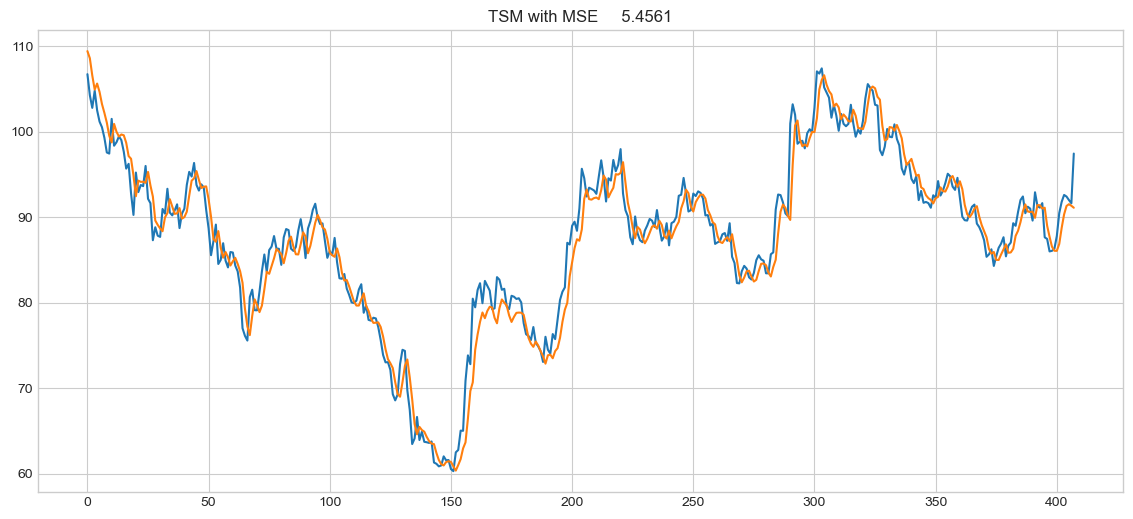

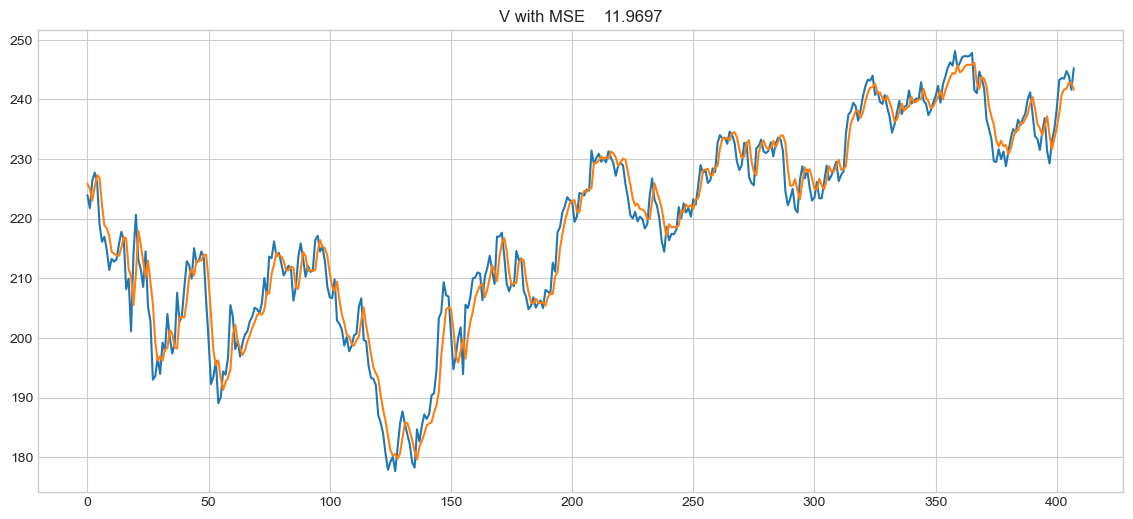

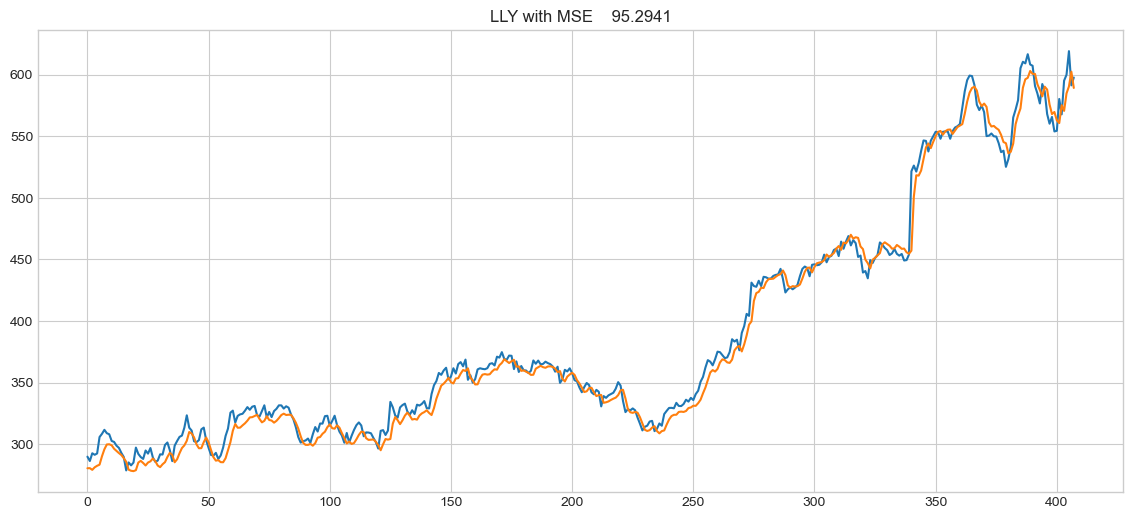

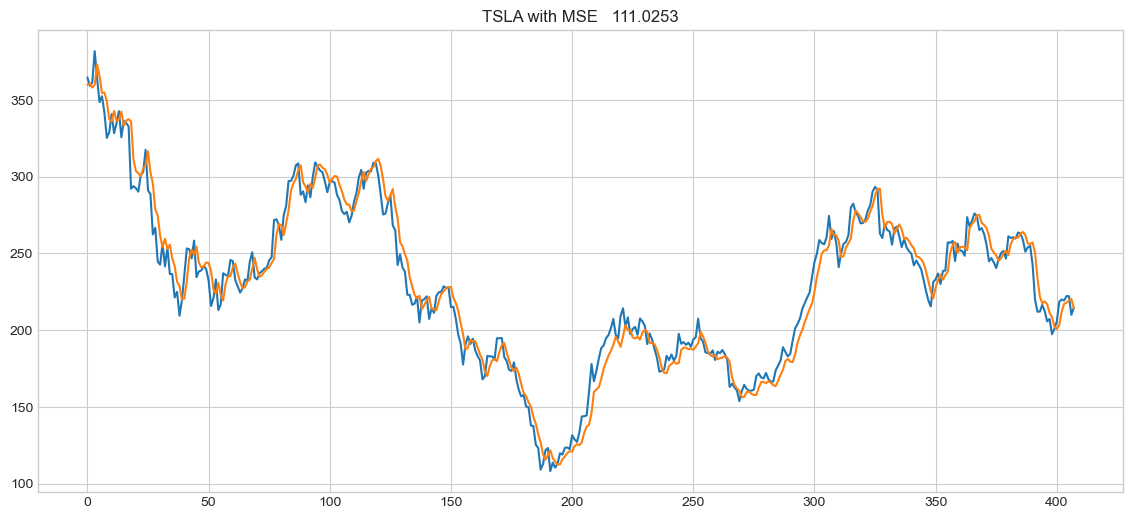

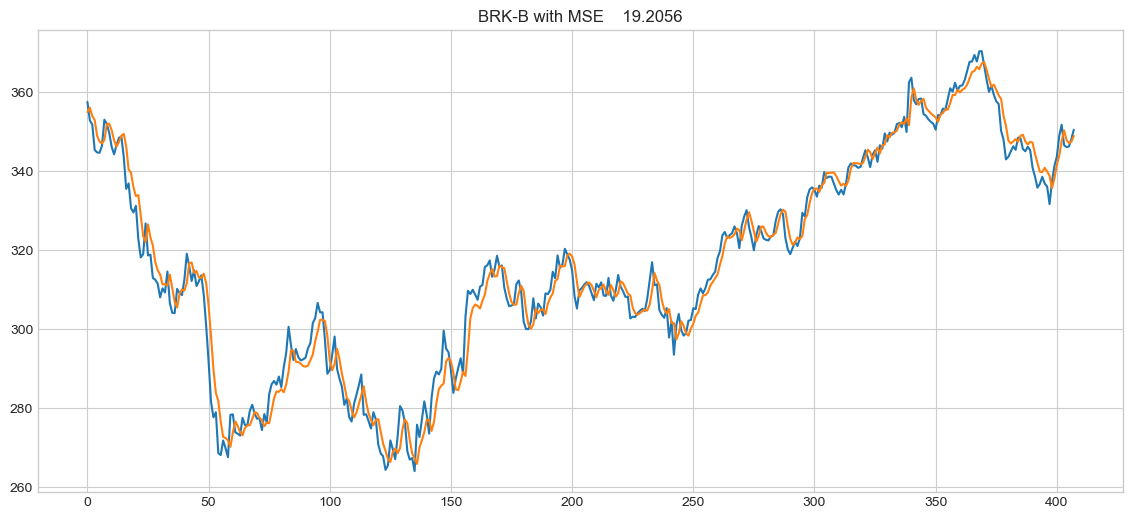

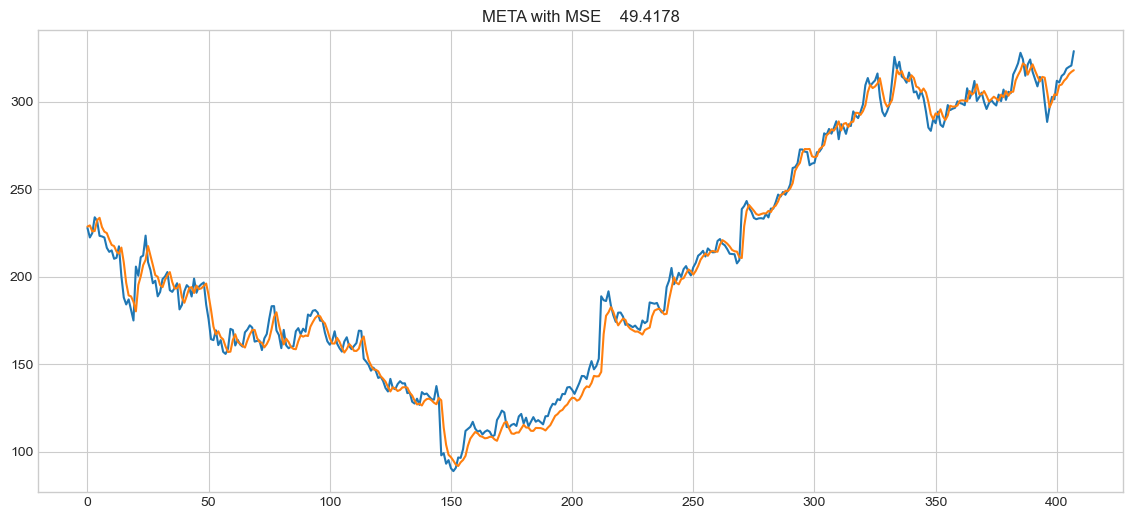

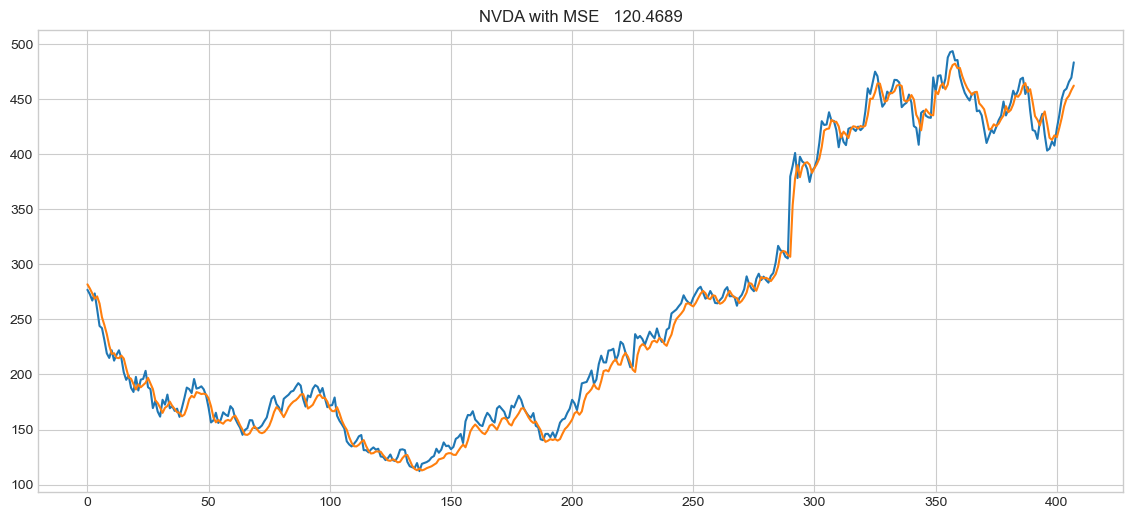

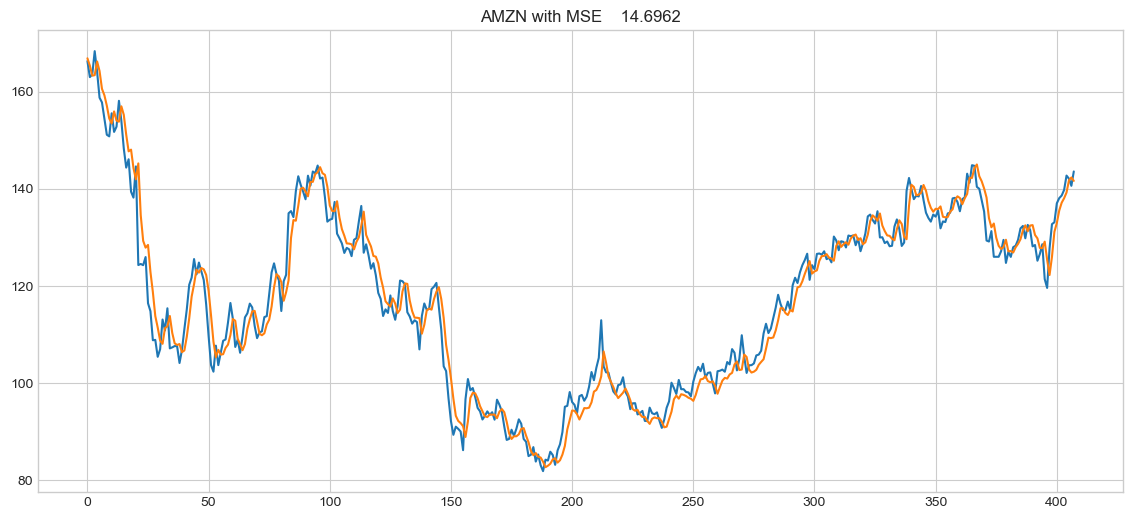

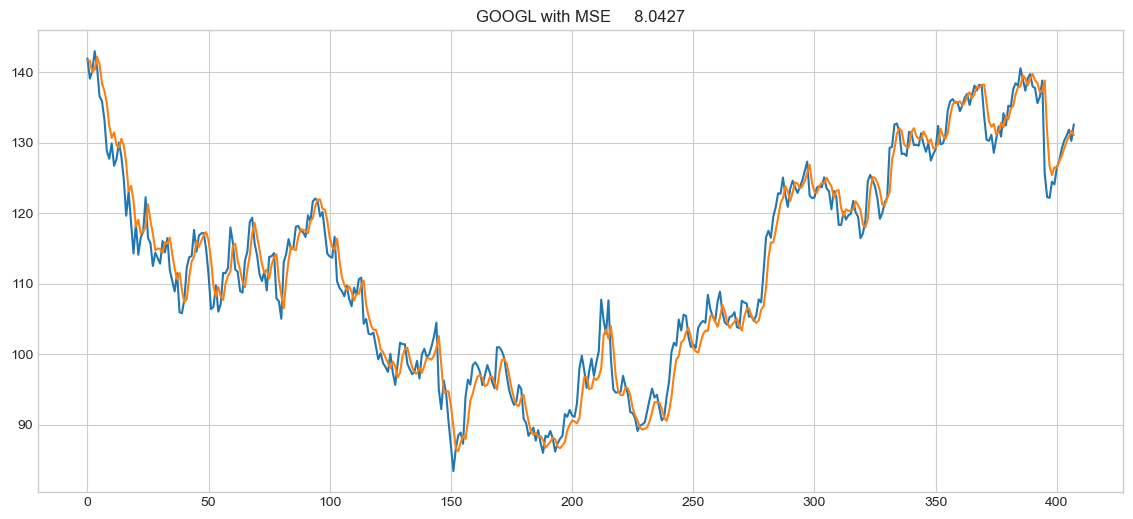

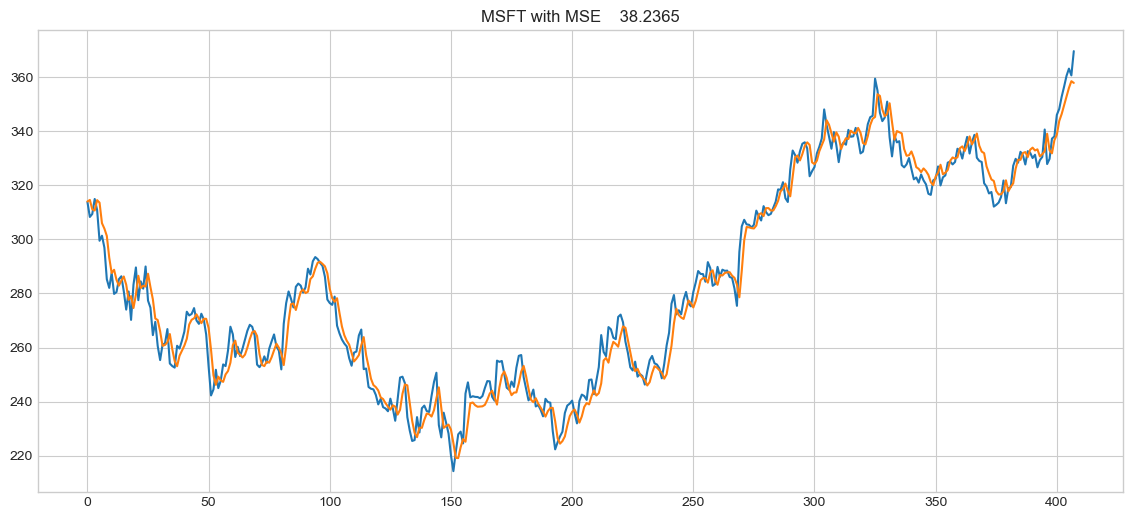

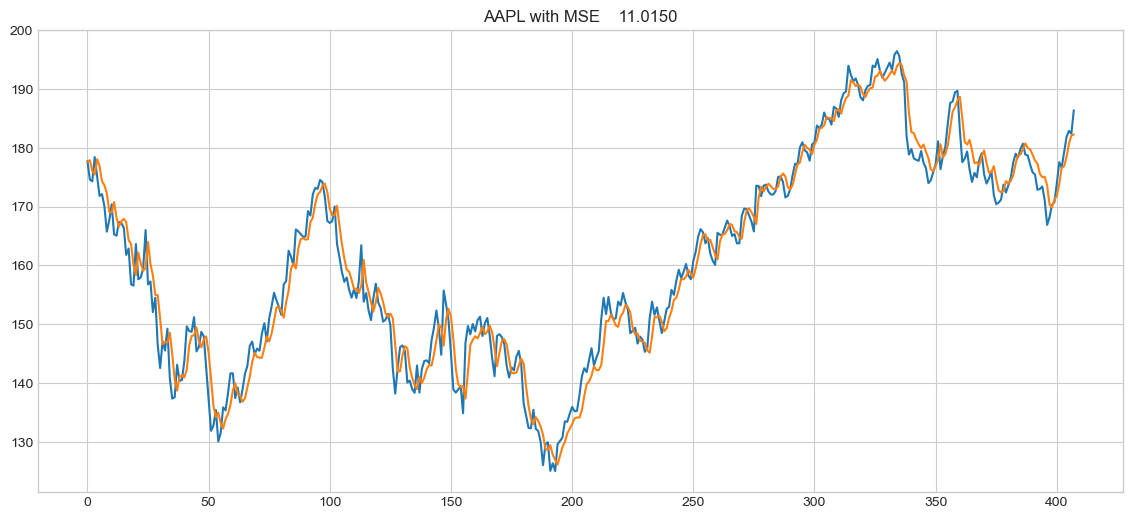

In [32]:
pred_result = {}
for i in stockList:
    y_true = scaler[i].inverse_transform(testset[i]["y"].reshape(-1,1))
    y_pred = scaler[i].inverse_transform(regressor.predict(testset[i]["X"]))
    MSE = mean_squared_error(y_true, y_pred)
    pred_result[i] = {}
    pred_result[i]["True"] = y_true
    pred_result[i]["Pred"] = y_pred
    
    plt.figure(figsize=(14,6))
    plt.title("{} with MSE {:10.4f}".format(i,MSE))
    plt.plot(y_true)
    plt.plot(y_pred)